# Please note the notebook is still a draft!

Pomysł na zajęcia:
- demo robimy live
- warian na czysto -- ktoś może przygotować w domu -- najlepiej różne ktosie na różnych zbiorach

- inny task na tych danych -- rekomendacje produktów finansowych

In [1]:
!pip install numpy pandas matplotlib seaborn

# Task 1: Open the data

https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1/code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys

In [3]:
data_directory = './BIGarchive/Loan_status_2007-2020Q3.gzip'
os.path.isfile(data_directory)

True

In [4]:
data = pd.read_csv(data_directory, low_memory=False, index_col=0) 

In [3]:
display(data.info)

NameError: name 'data' is not defined

In [ ]:
data.head()

In [ ]:
print(data.describe())

# Task 2 - define the target (predict load status)

default -- fails to make paiments

In [ ]:
data['loan_status'].drop_duplicates()

In [ ]:
data['loan_status']

In [15]:
mapping = {
    "Fully Paid" : 0,
    "Current" : np.nan,
    "Charged Off" : 1,
    "Late (31-120 days)" : np.nan,
    "In Grace Period" : np.nan,
    "Late (16-30 days)" : np.nan,
    "Issued" : np.nan,
    "Does not meet the credit policy. Status:Fully Paid" : np.nan,
    "Does not meet the credit policy. Status:Charged Off" : np.nan,
    "Default" : 1
}

In [21]:
data['target'] = data['loan_status'].map(mapping)
data['target'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

# Data types - analyse and fix

- What datatypes do we have in pandas (https://pandas.pydata.org/docs/reference/arrays.html)?
- What is in the data?
- What can we fix? How can we do the preprocessing semi-automatic?

In [22]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
       'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'target'],
      dtype='object', length=142)

In [24]:
for column in data.columns:
    print(f"{column}: {data[column].dtype}")
    

id: object
loan_amnt: float64
funded_amnt: float64
funded_amnt_inv: float64
term: object
int_rate: object
installment: float64
grade: object
sub_grade: object
emp_title: object
emp_length: object
home_ownership: object
annual_inc: float64
verification_status: object
issue_d: object
loan_status: object
pymnt_plan: object
url: object
purpose: object
title: object
zip_code: object
addr_state: object
dti: float64
delinq_2yrs: float64
earliest_cr_line: object
fico_range_low: float64
fico_range_high: float64
inq_last_6mths: float64
mths_since_last_delinq: float64
mths_since_last_record: float64
open_acc: float64
pub_rec: float64
revol_bal: float64
revol_util: object
total_acc: float64
initial_list_status: object
out_prncp: float64
out_prncp_inv: float64
total_pymnt: float64
total_pymnt_inv: float64
total_rec_prncp: float64
total_rec_int: float64
total_rec_late_fee: float64
recoveries: float64
collection_recovery_fee: float64
last_pymnt_d: object
last_pymnt_amnt: float64
next_pymnt_d: object


# Basic analysis

- target distribution
- empty values (total and per status)
- variable distribution (total and per status)
- historical stability (total and per status)
- *correlation
- *predictive strength

In [20]:
!pip install signal-cli

  Obtaining dependency information for signal-cli from https://files.pythonhosted.org/packages/40/55/a3add2b8b1309b76f44b1f358d7d36907a7166e50a62b826712107a19812/signal_cli-0.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for filetype==1.2.0 from https://files.pythonhosted.org/packages/18/79/1b8fa1bb3568781e84c9200f951c735f3f157429f44be0495da55894d620/filetype-1.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pathlib==1.0.1 from https://files.pythonhosted.org/packages/78/f9/690a8600b93c332de3ab4a344a4ac34f00c8f104917061f779db6a918ed6/pathlib-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for requests==2.22.0 from https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
     ---------------------------------------- 78.6/78.6 kB 2.2 MB/s eta 0:00:00
  Preparing

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-server 2.27.3 requires requests>=2.31, but you have requests 2.22.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import signal

signal_handler = lambda: print("It was too long!")

signal.signal(signal.SIGALRM, signal_handler)
signal.alarm(4)

AttributeError: module 'signal' has no attribute 'SIGALRM'

In [35]:
data["hardship_start_date"] = pd.to_datetime(data["hardship_start_date"], format="%b-%Y")
data["hardship_start_date"].drop_duplicates()

0               NaT
2712     2017-05-01
3136     2017-06-01
3239     2017-09-01
6937     2017-10-01
9279     2017-12-01
15796    2017-08-01
22131    2017-07-01
35152    2018-01-01
38533    2018-03-01
39301    2018-02-01
1        2020-04-01
4        2020-02-01
369      2020-05-01
376      2018-11-01
751      2018-08-01
786      2019-05-01
867      2019-01-01
939      2019-07-01
946      2018-07-01
1277     2018-09-01
1781     2019-03-01
1794     2019-11-01
1955     2019-10-01
2113     2019-12-01
2252     2020-01-01
2441     2018-12-01
2447     2018-06-01
2604     2018-10-01
2673     2019-04-01
5634     2019-02-01
5747     2019-06-01
9288     2019-08-01
9480     2020-03-01
11491    2019-09-01
44420    2017-11-01
60909    2018-05-01
61723    2018-04-01
37869    2017-02-01
225193   2017-03-01
155      2020-07-01
504      2020-10-01
2264     2020-08-01
3854     2020-06-01
5667     2020-09-01
248282   2017-04-01
66158    2017-01-01
Name: hardship_start_date, dtype: datetime64[ns]

C:\Users\300522\Documents\GitHub\demos\venv\lib\site-packages\matplotlib\cbook.py:1762: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


<Axes: >

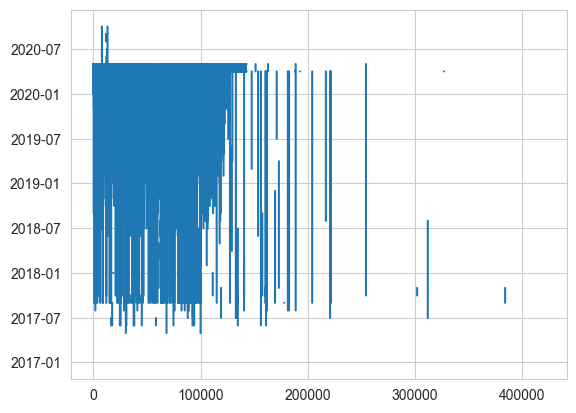

In [37]:
data["hardship_start_date"].plot()

In [33]:
enum = {'Jan':"01",
            'Feb':"02",
            'Mar':"03",'Apr':"04",'May':"05",'Jun':"06",'Jul':"07",'Aug':"08",'Sep':"09",'Oct':"10",'Nov':"11",'Dec':"12"}

def date_mapping(s):
    if s != "nan":
        return "01" + enum[s[:3]] + s[4:]
    else:
        print(s)

data['hardship_start_date'].drop_duplicates()
data['hardship_start_date'].map(date_mapping) # DEBUG

TypeError: 'float' object is not subscriptable

id has 2925493 unique values -- ommited


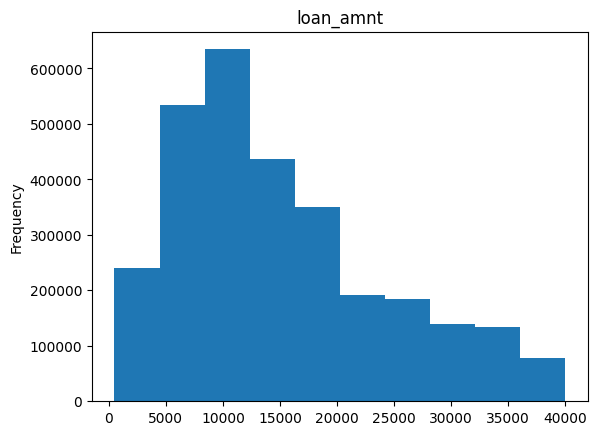

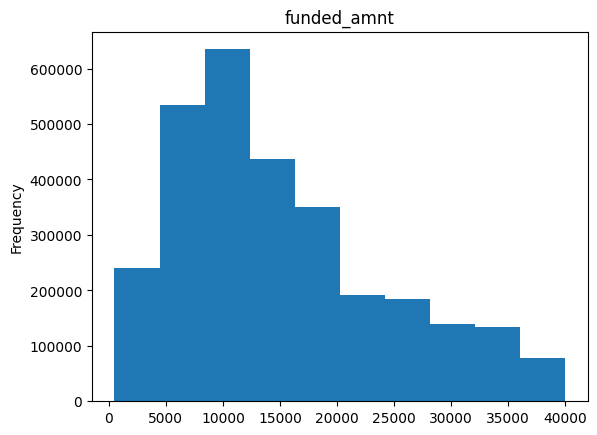

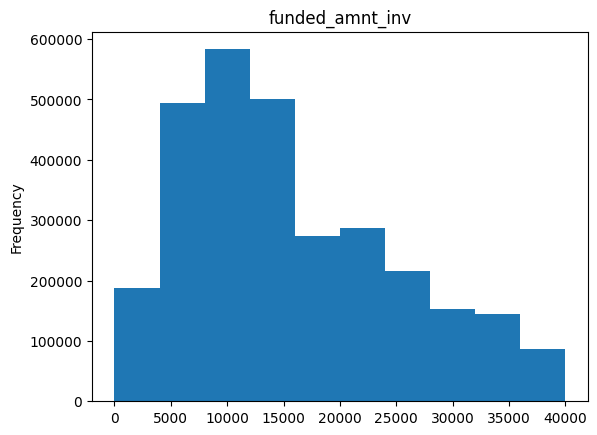

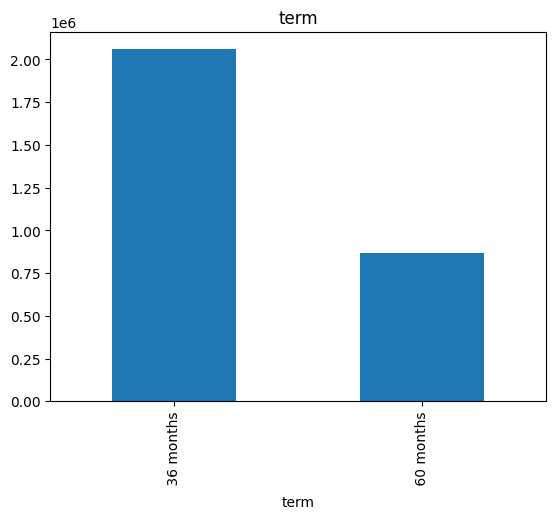

int_rate has 704 unique values -- ommited


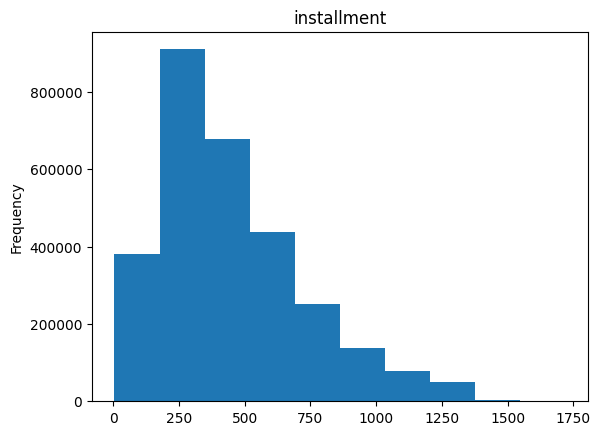

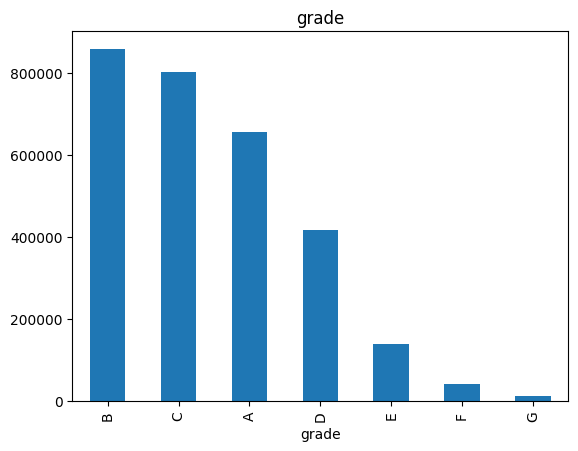

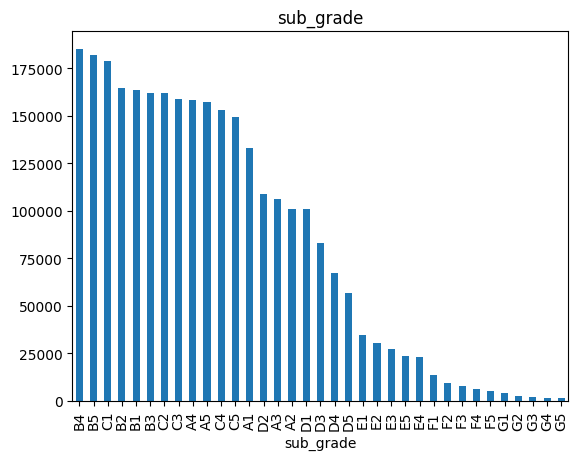

emp_title has 590413 unique values -- ommited


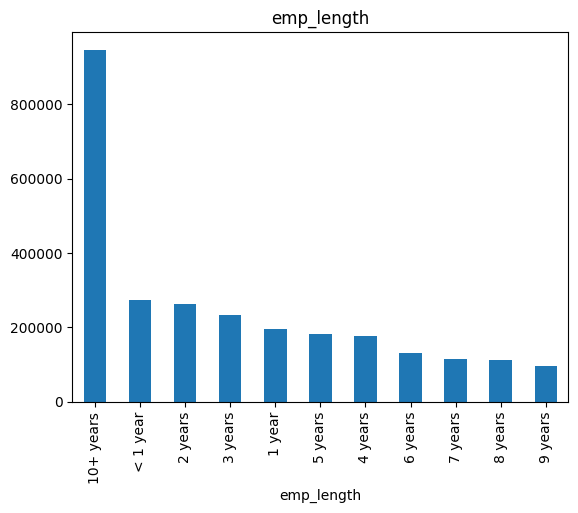

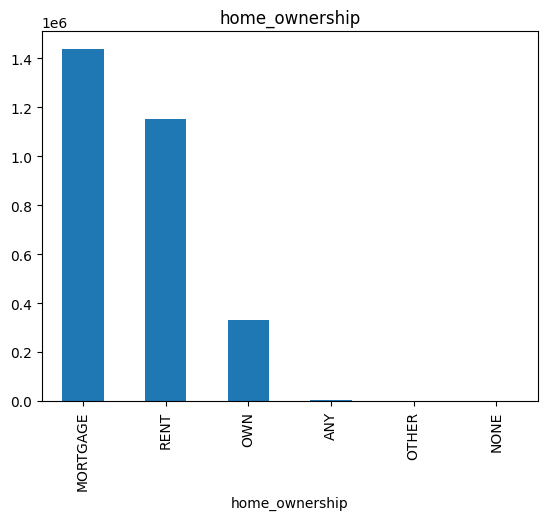

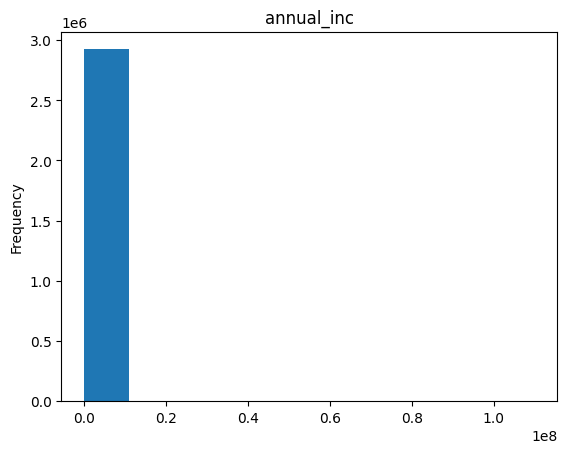

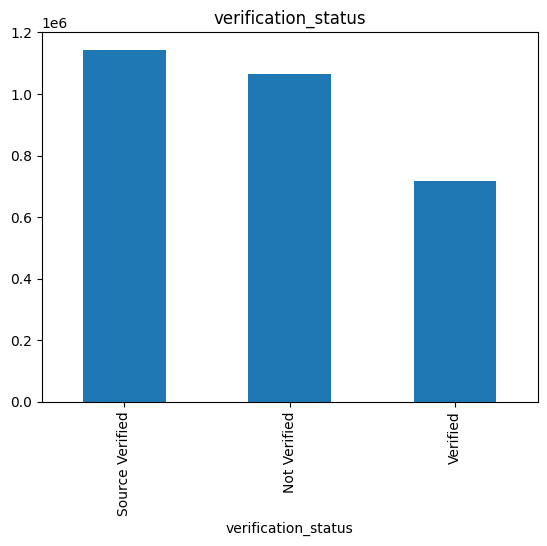

issue_d has 160 unique values -- ommited


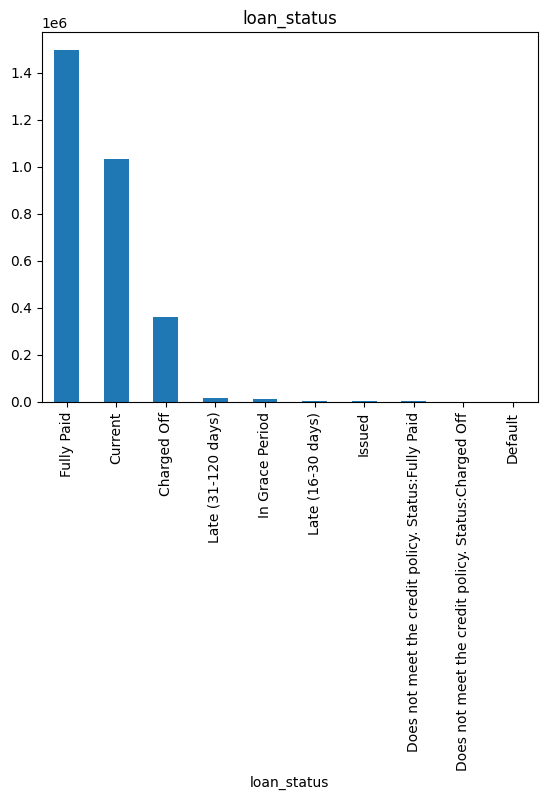

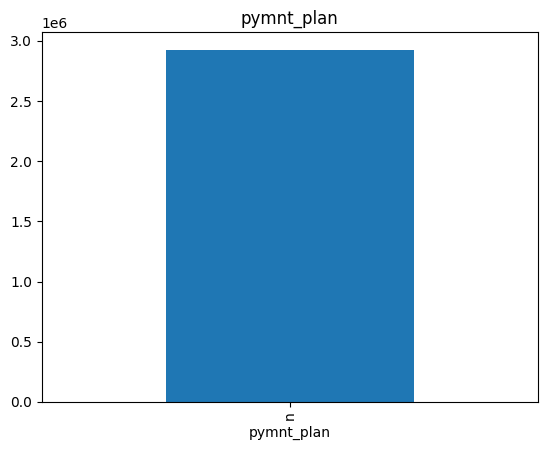

url has 2925492 unique values -- ommited


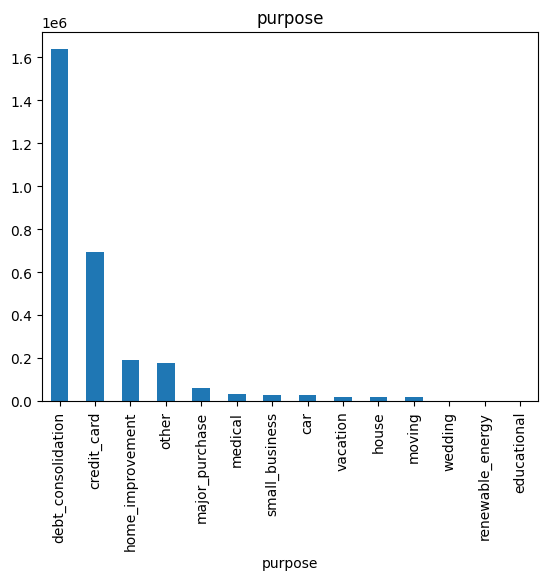

title has 63154 unique values -- ommited
zip_code has 962 unique values -- ommited


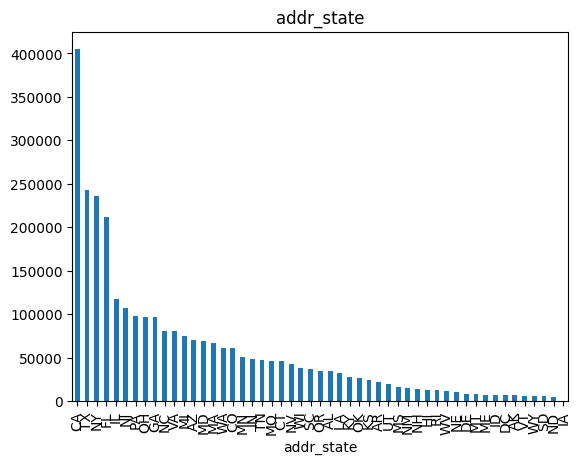

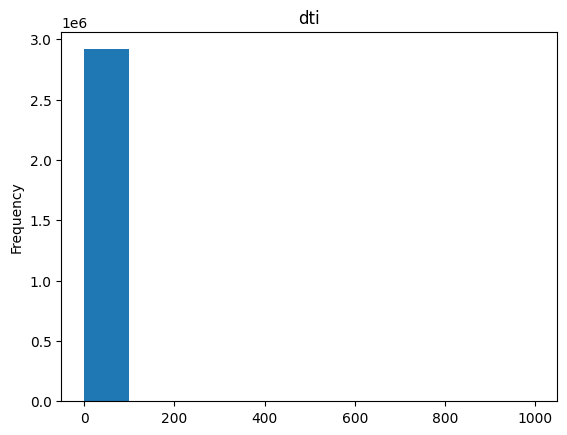

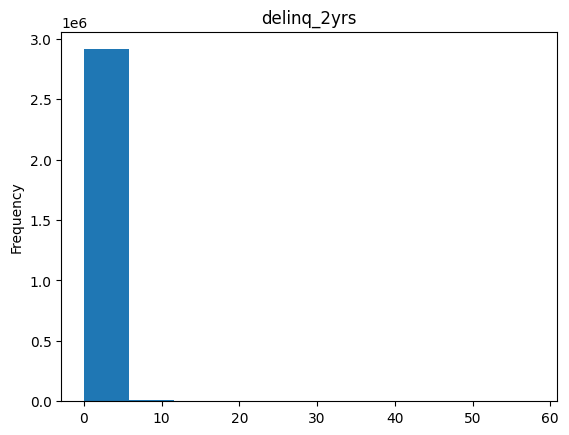

earliest_cr_line has 777 unique values -- ommited


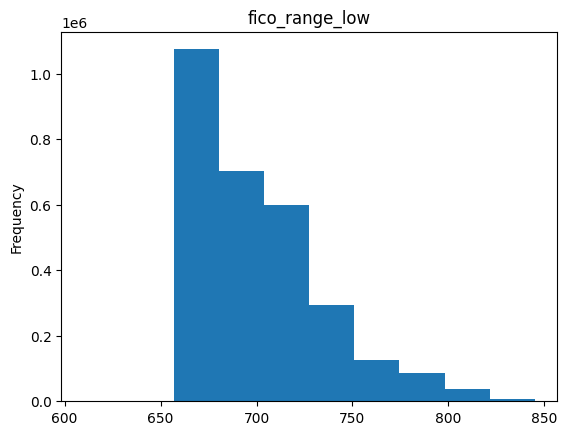

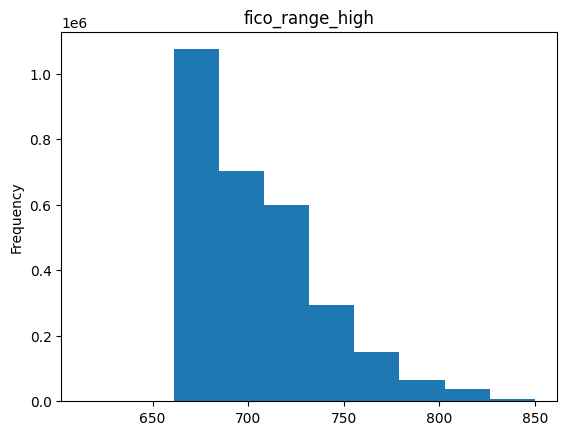

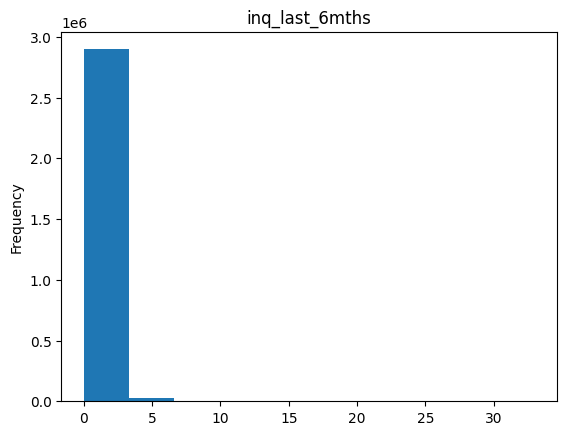

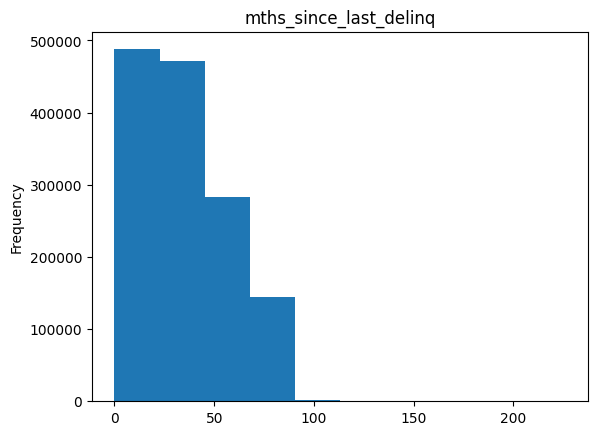

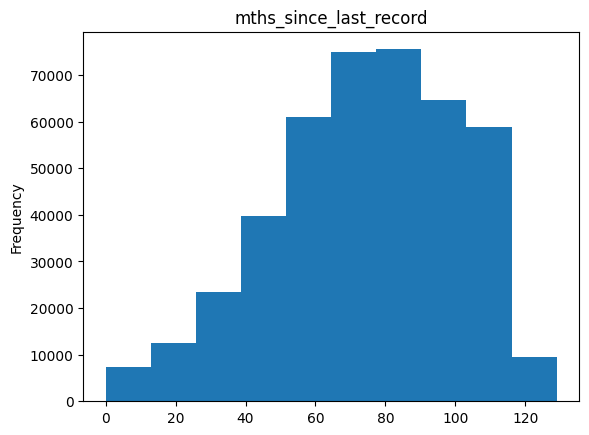

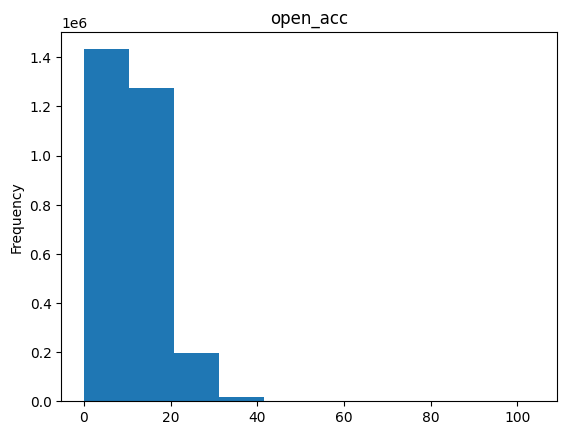

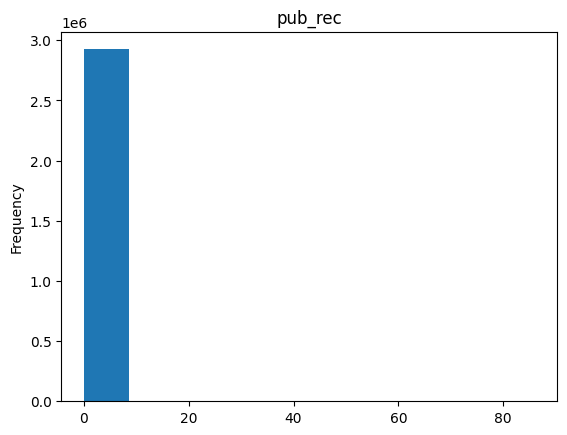

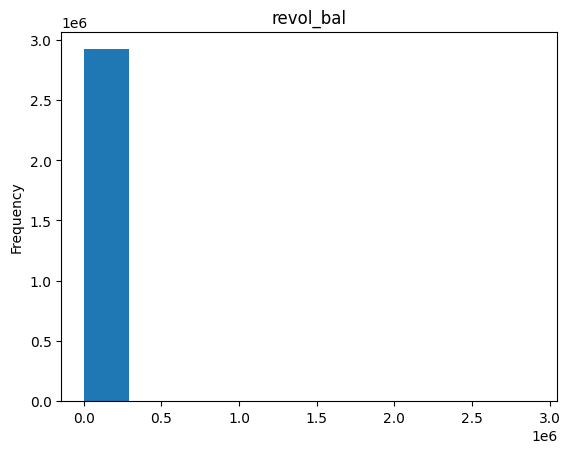

revol_util has 1443 unique values -- ommited


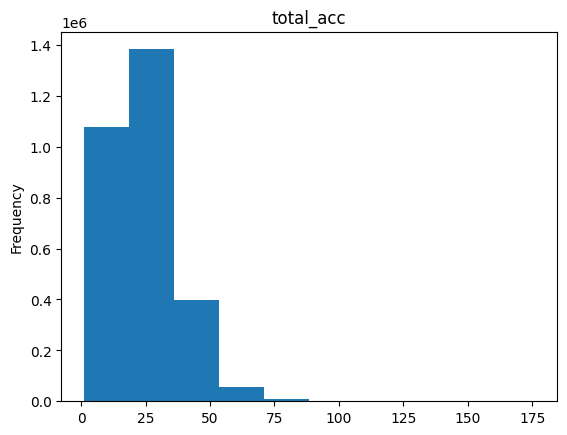

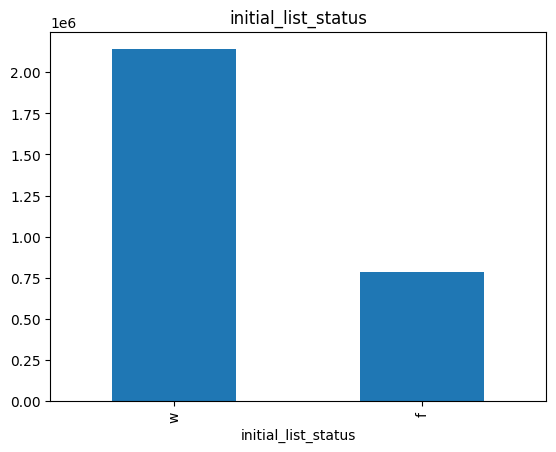

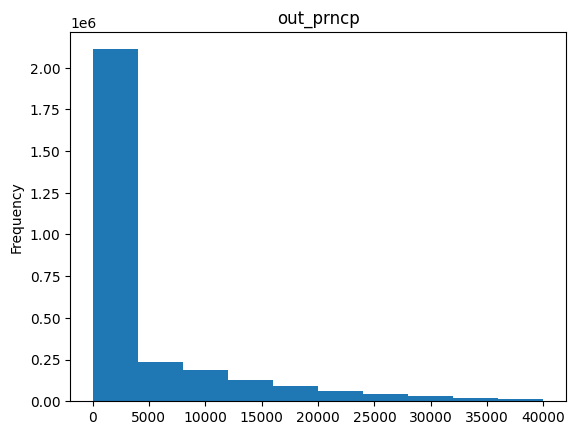

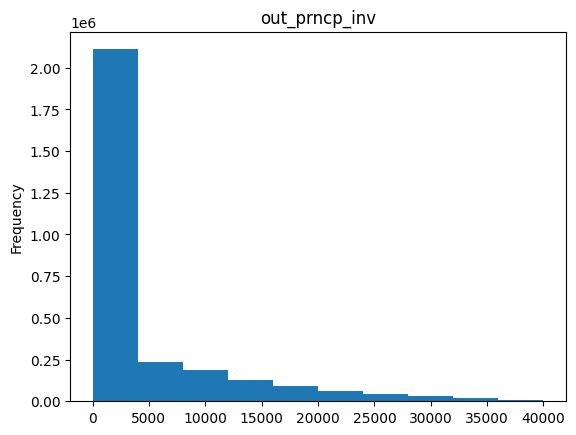

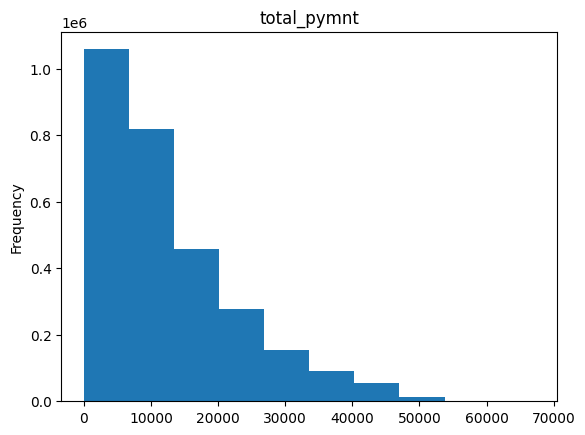

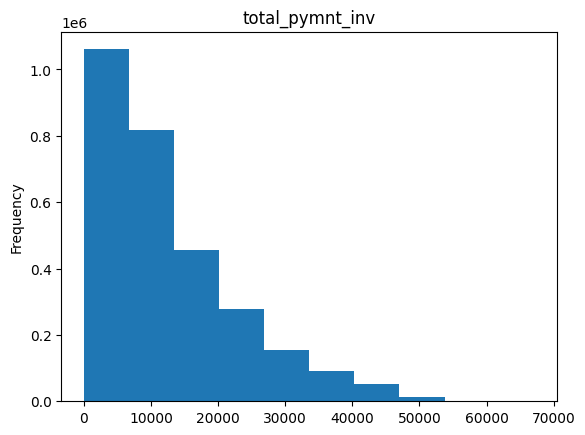

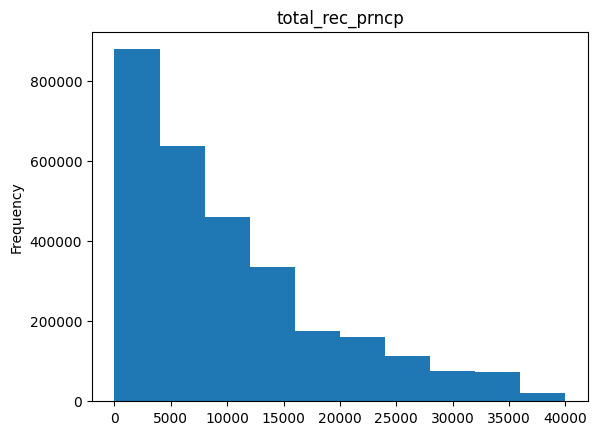

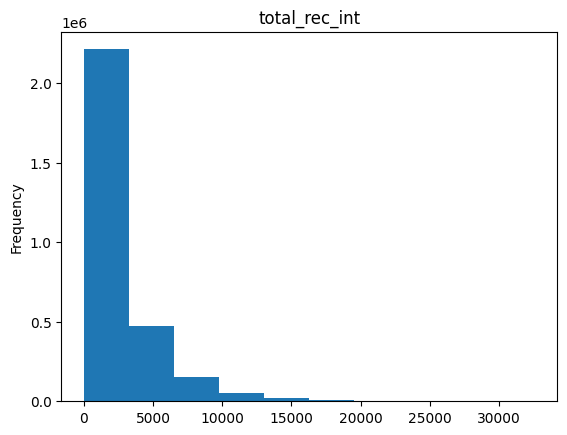

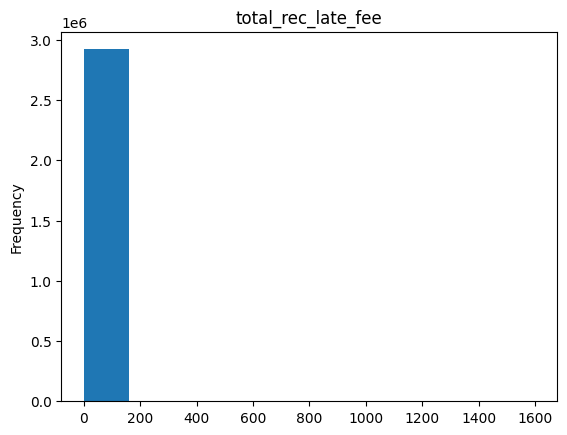

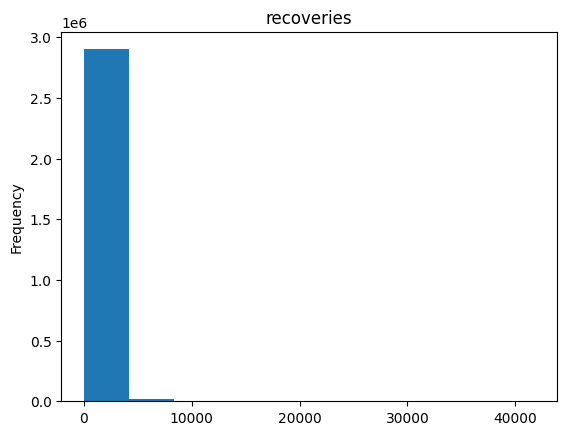

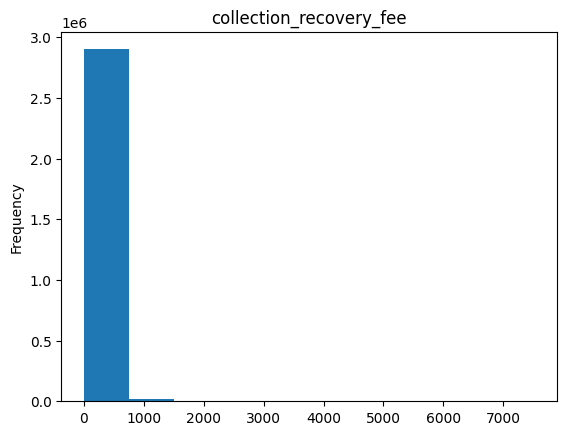

last_pymnt_d has 157 unique values -- ommited


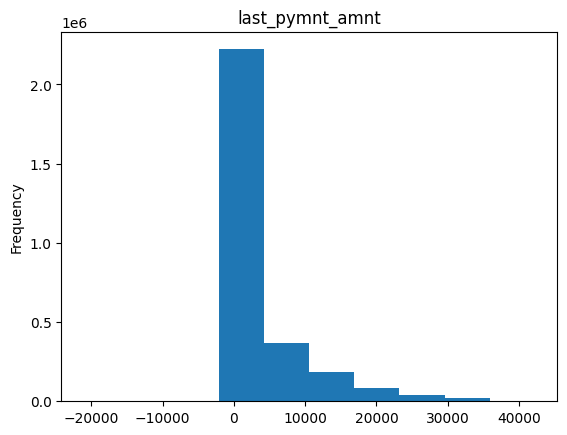

next_pymnt_d has 111 unique values -- ommited
last_credit_pull_d has 159 unique values -- ommited


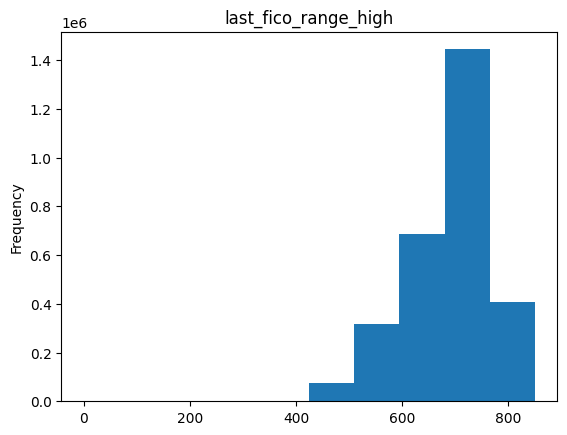

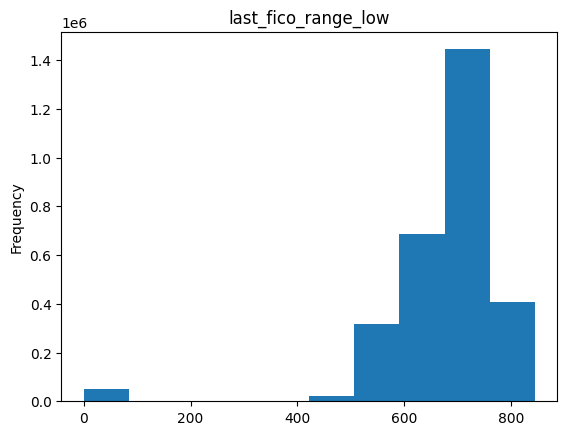

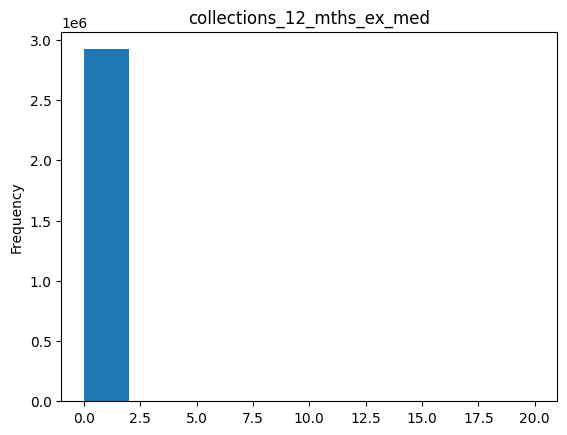

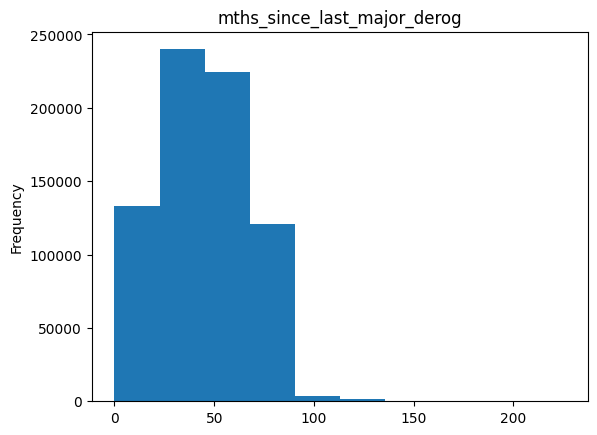

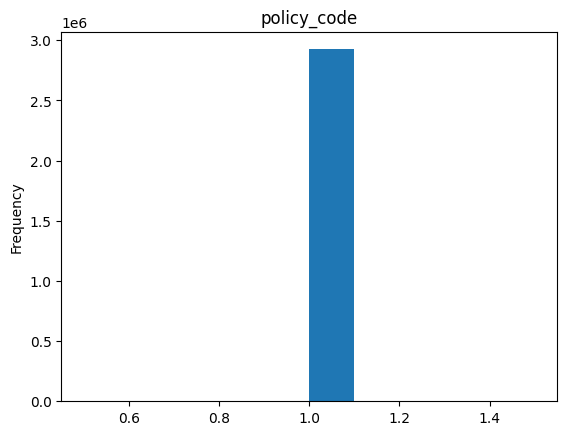

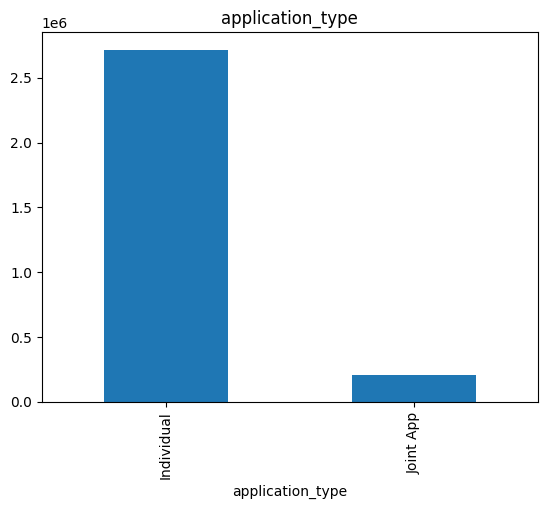

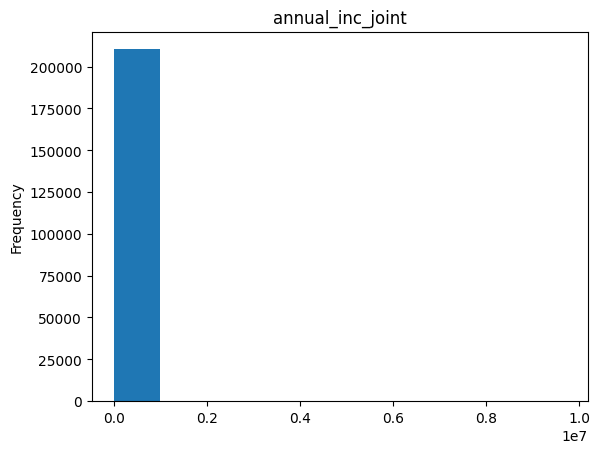

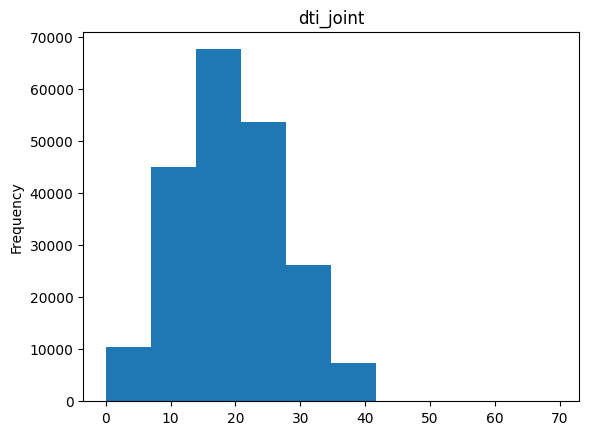

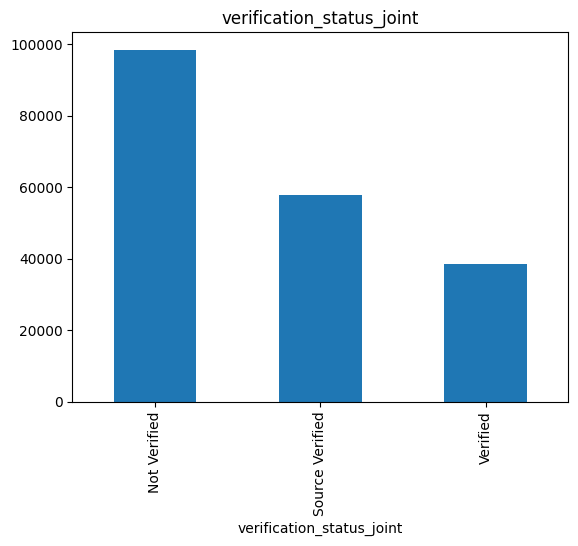

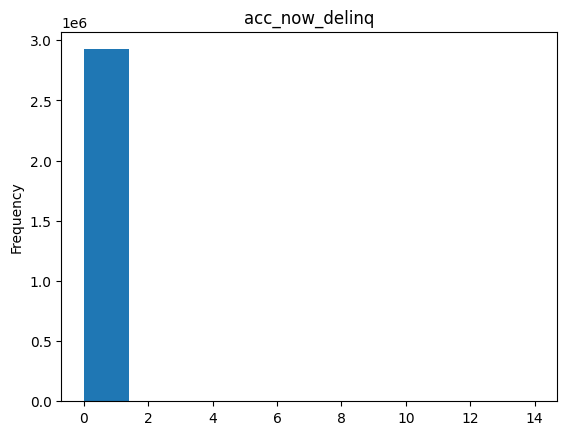

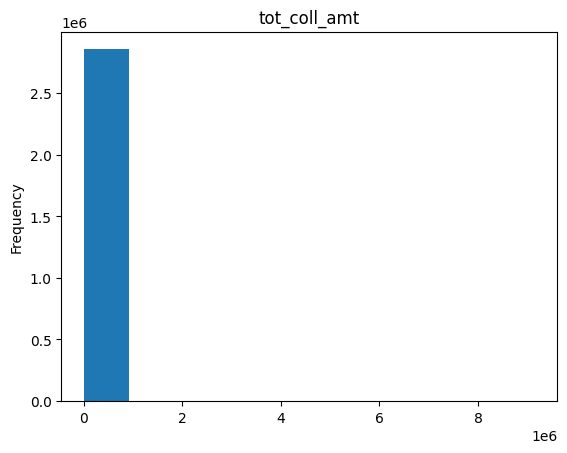

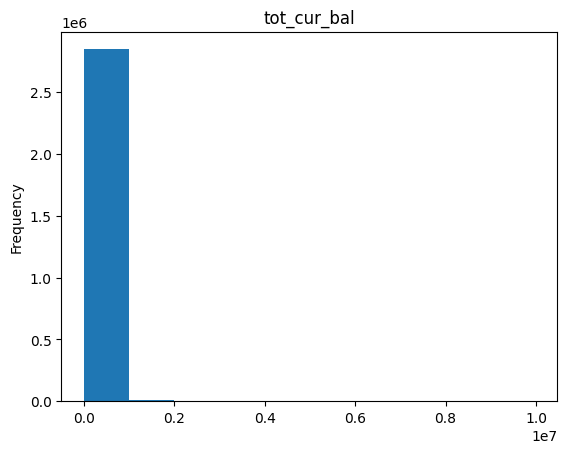

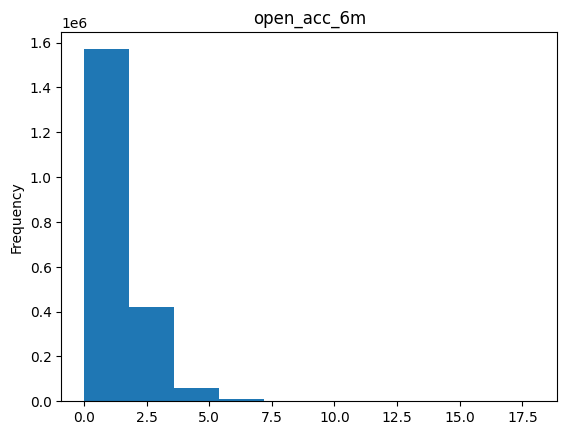

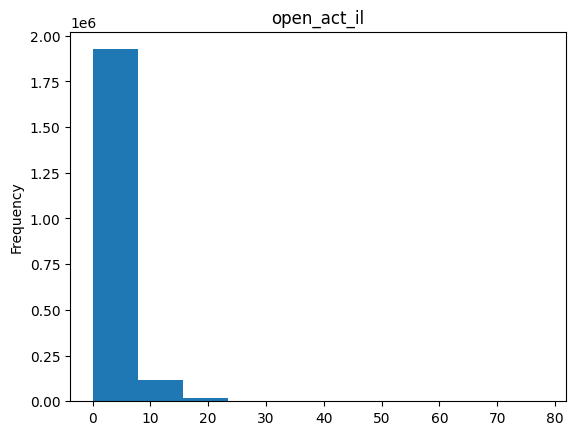

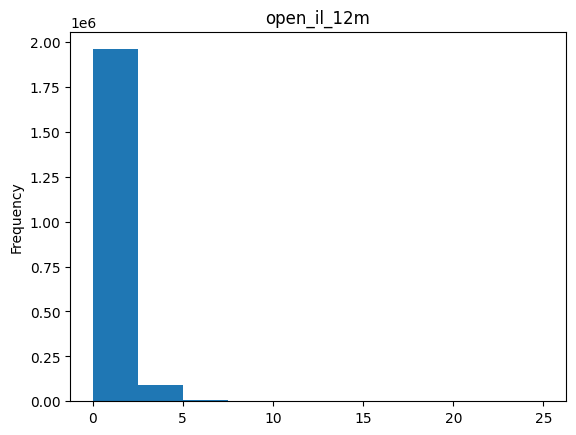

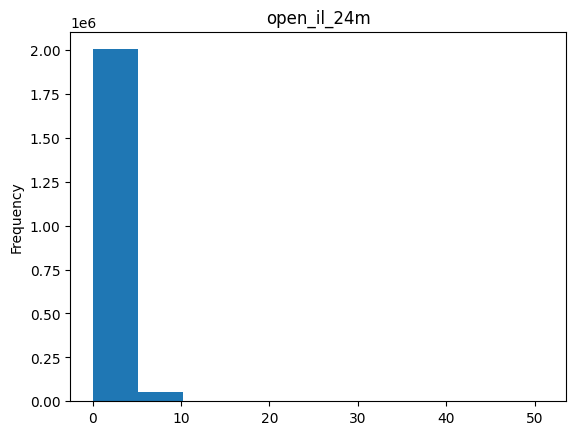

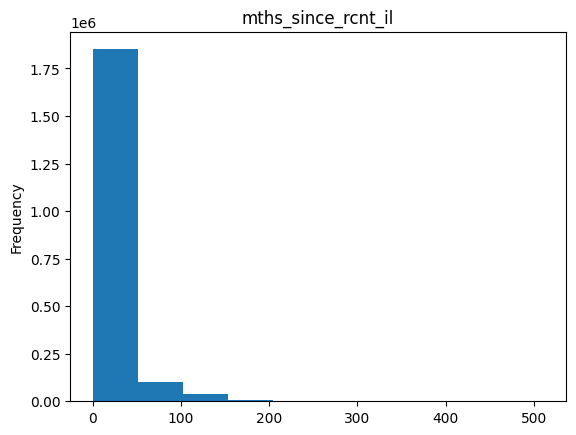

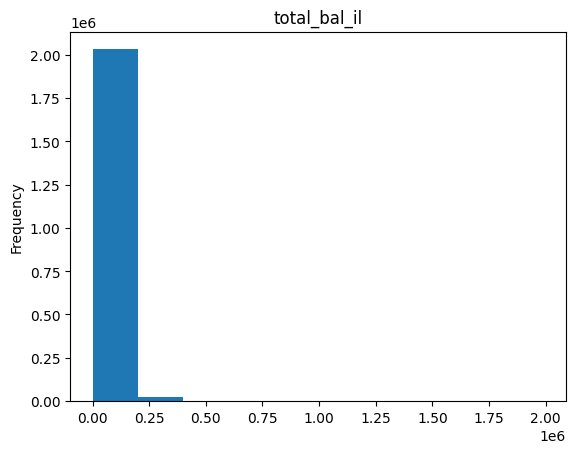

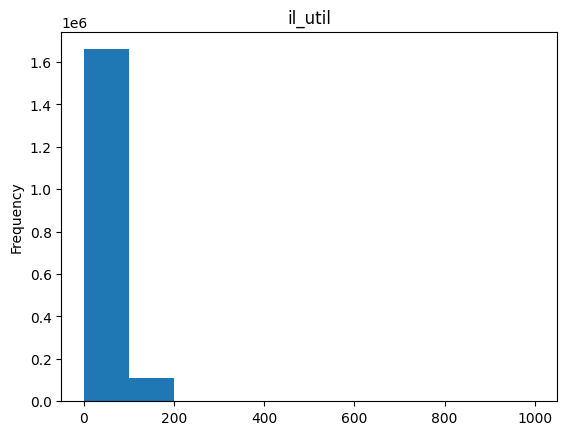

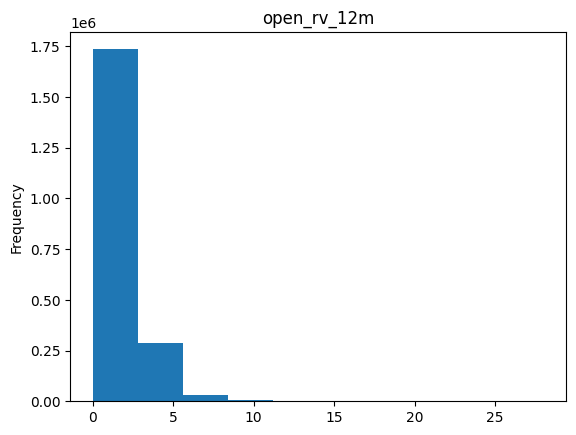

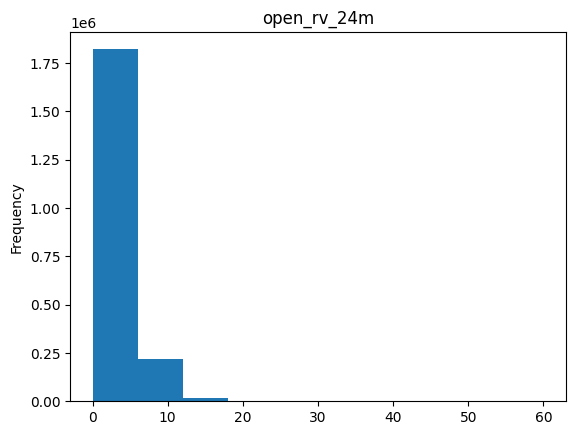

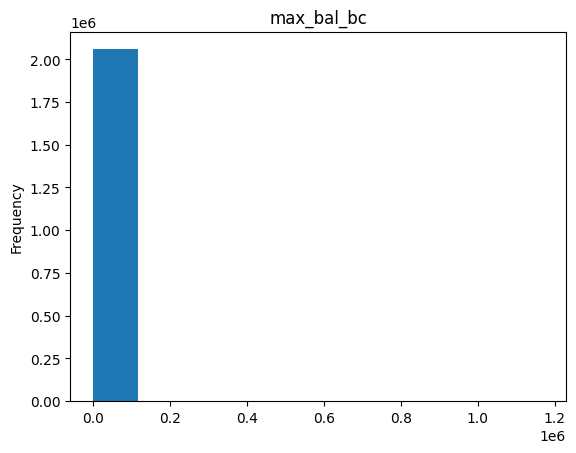

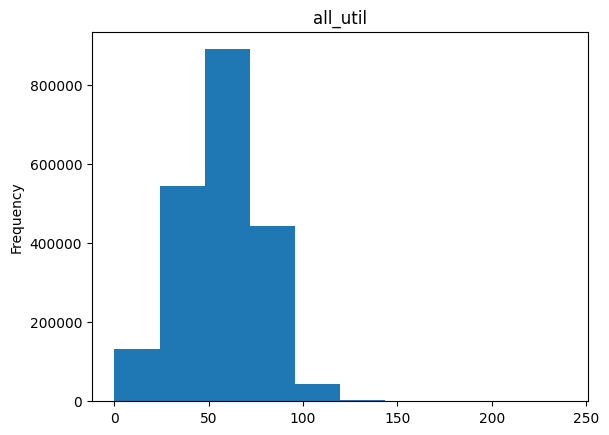

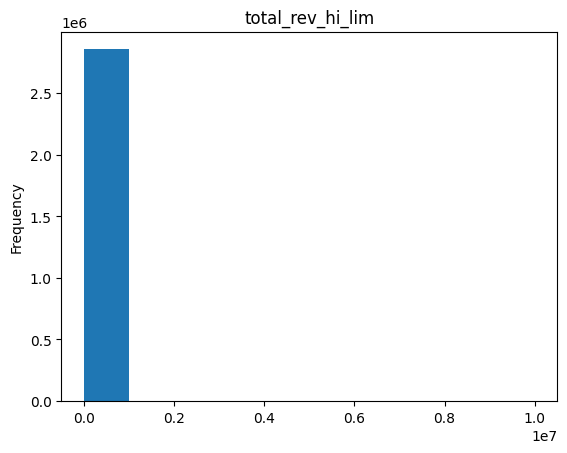

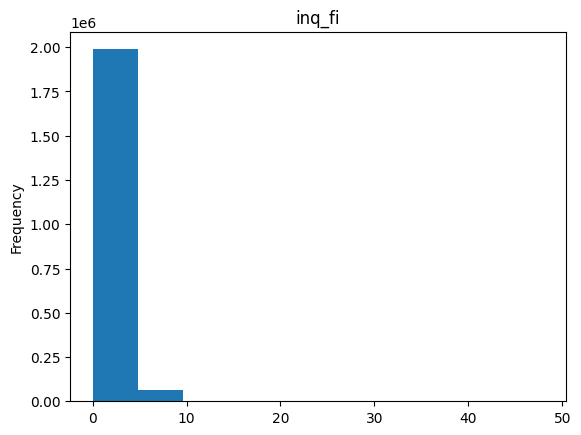

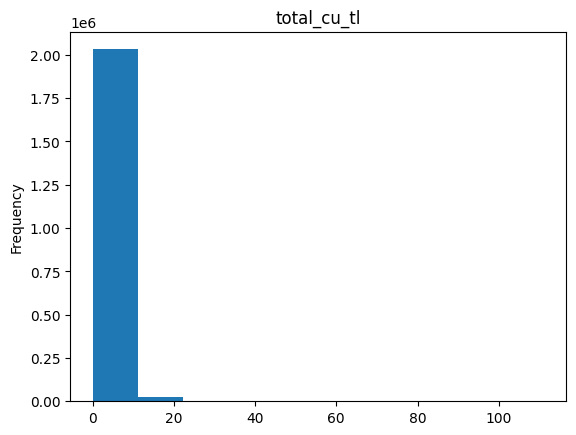

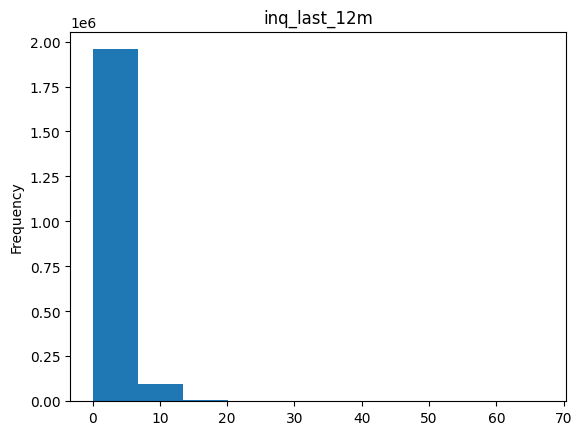

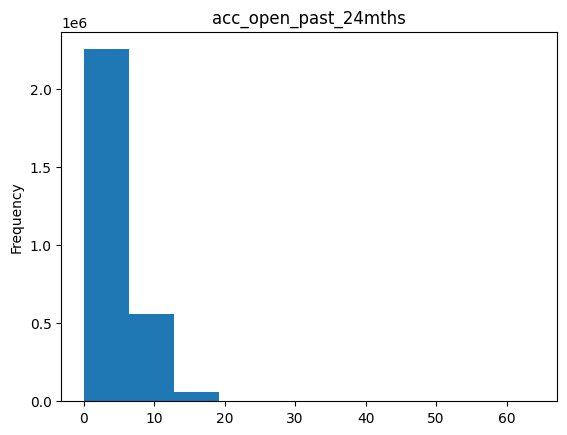

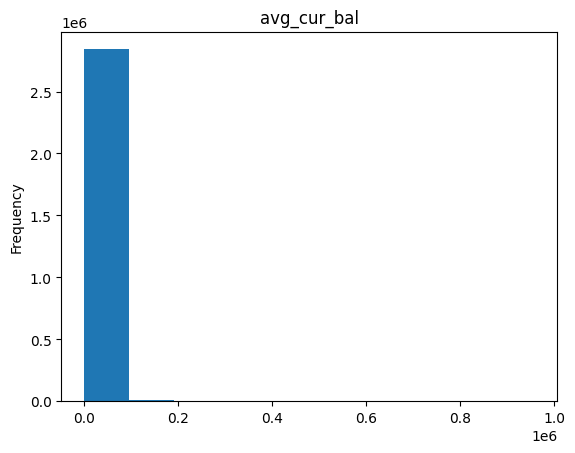

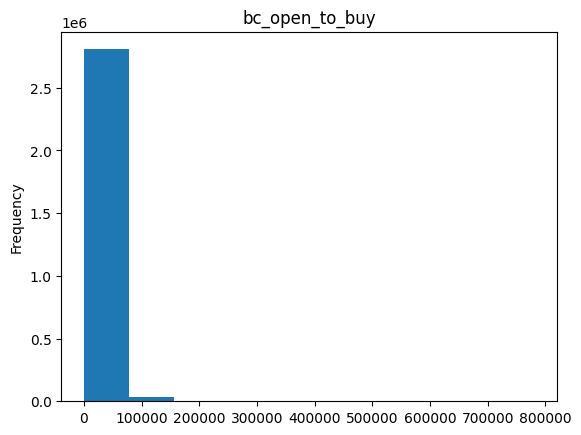

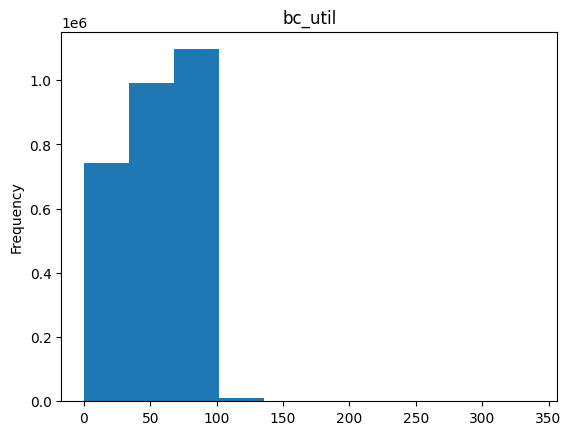

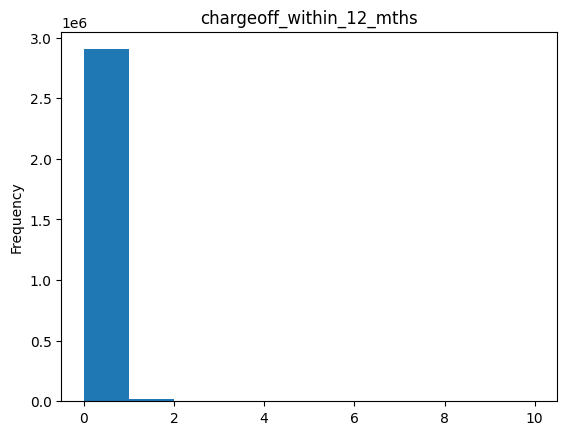

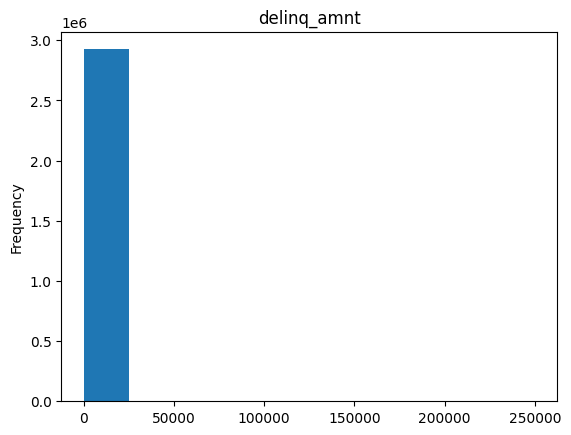

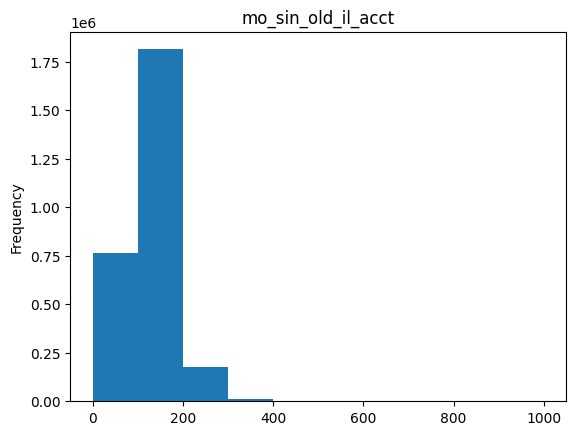

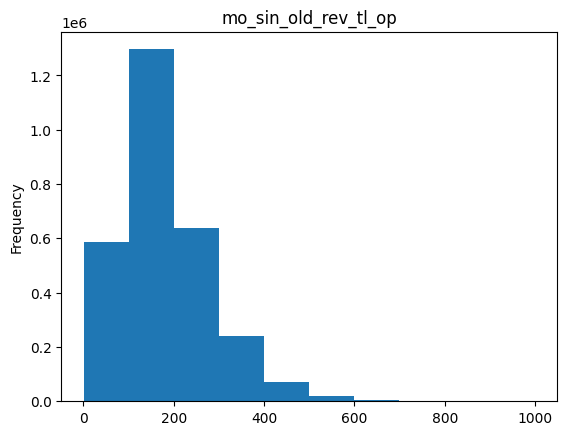

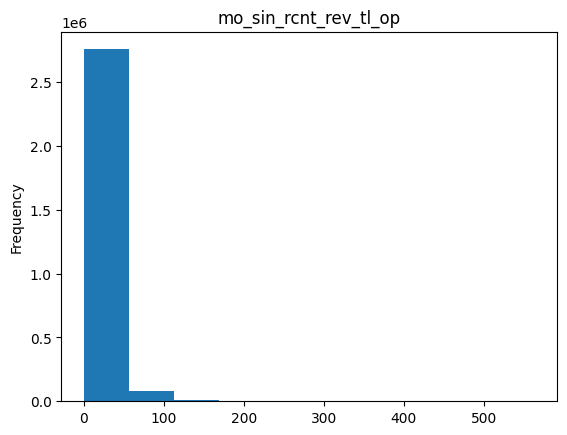

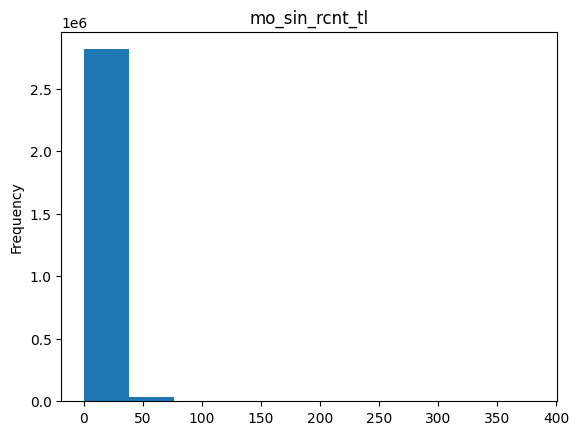

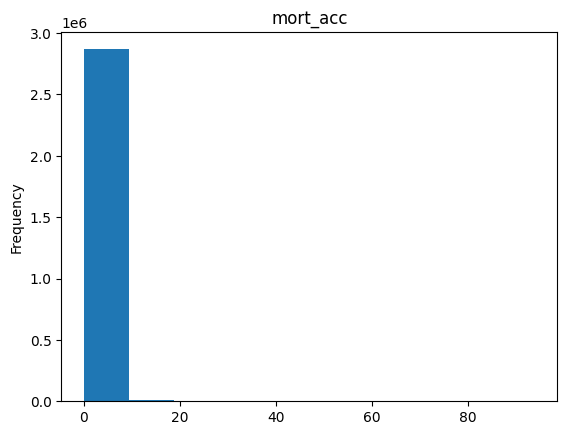

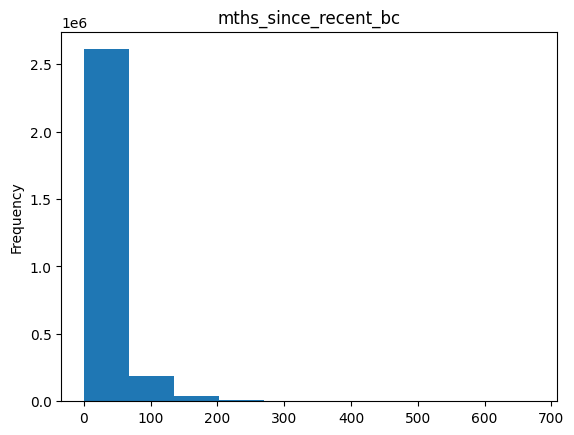

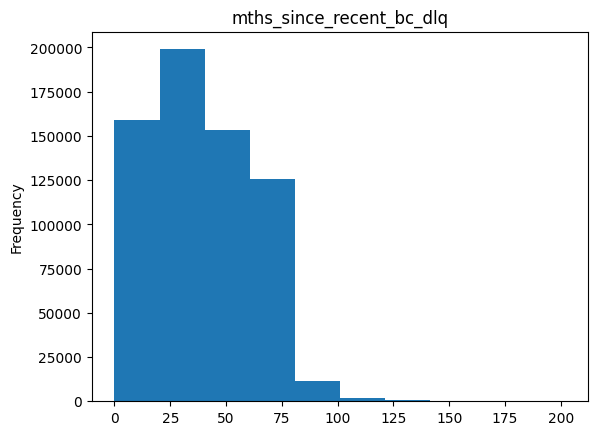

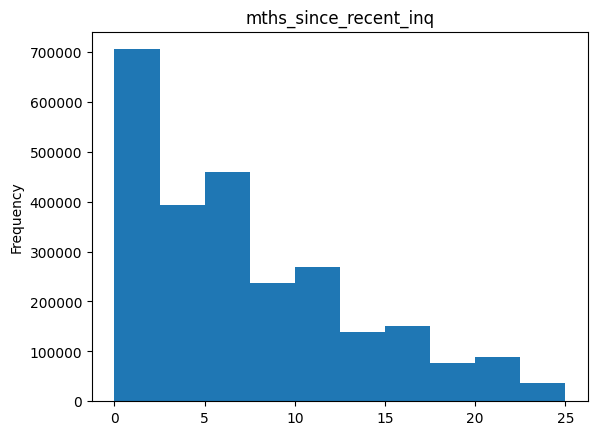

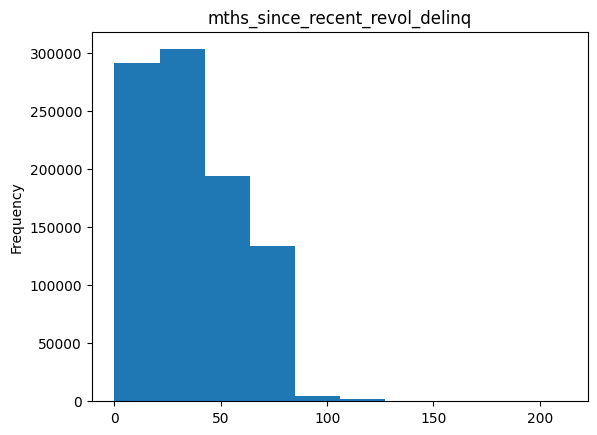

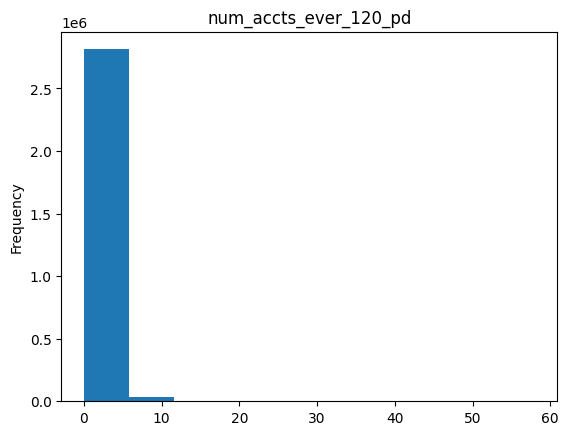

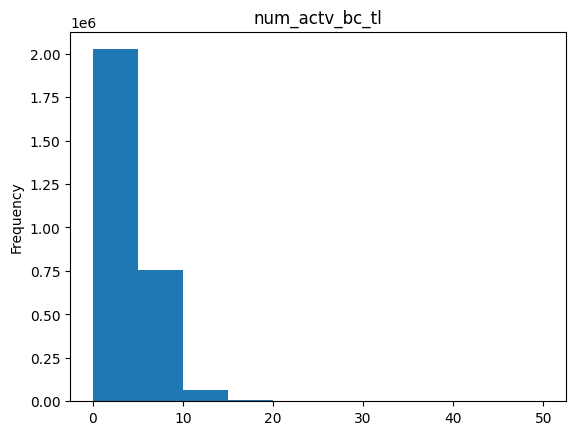

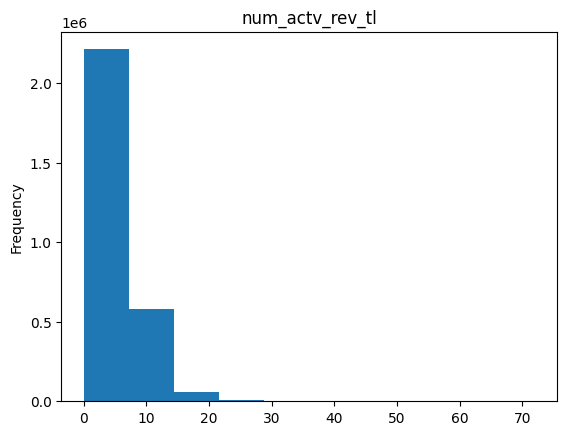

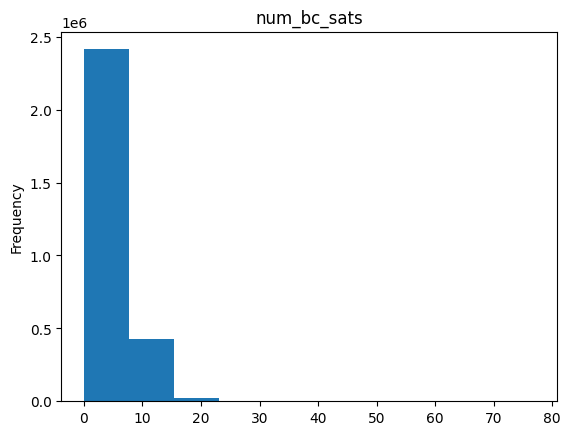

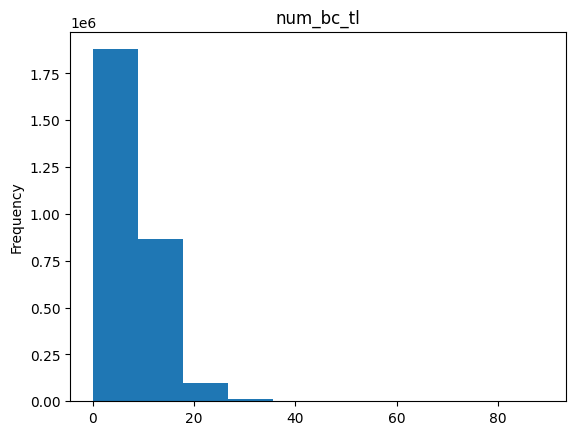

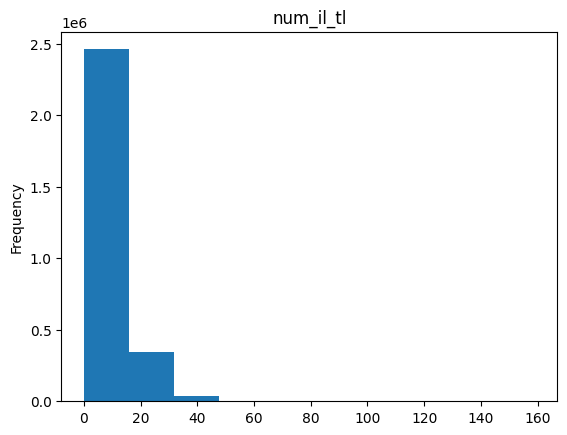

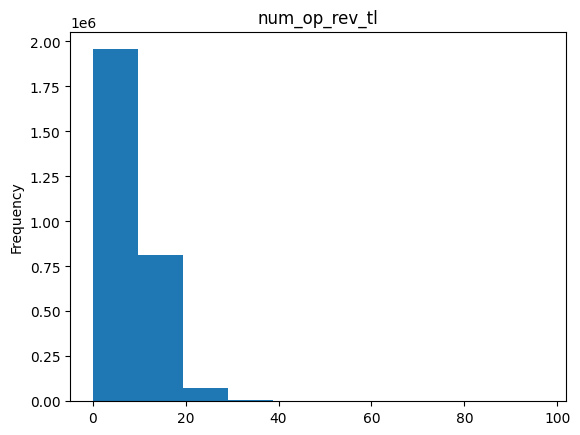

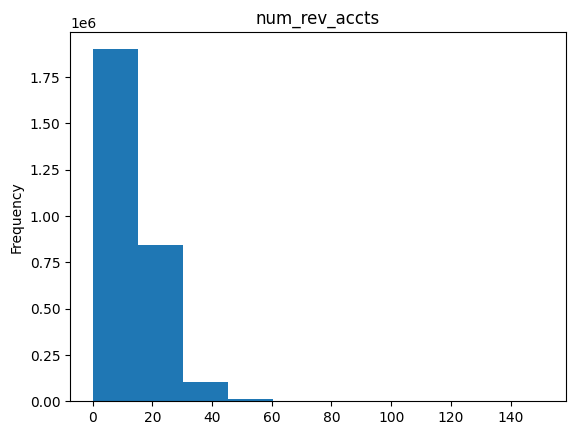

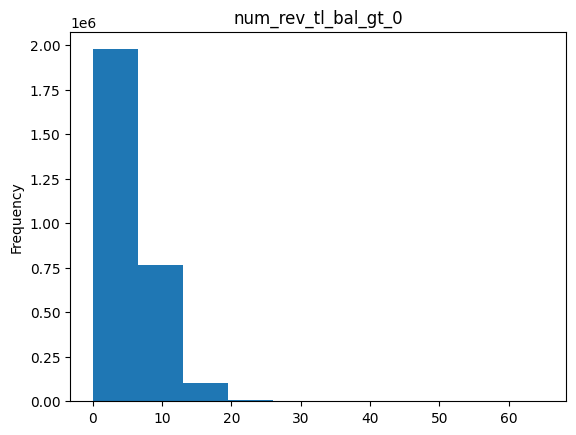

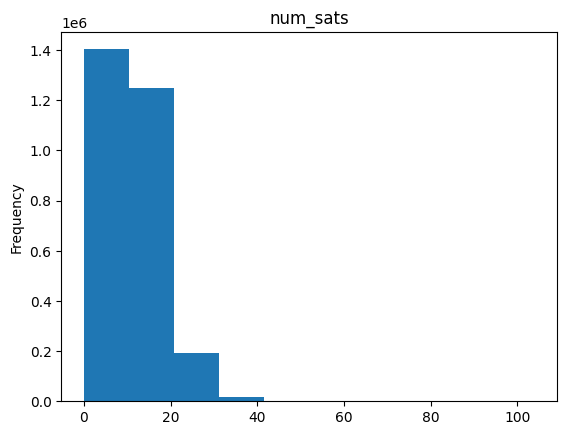

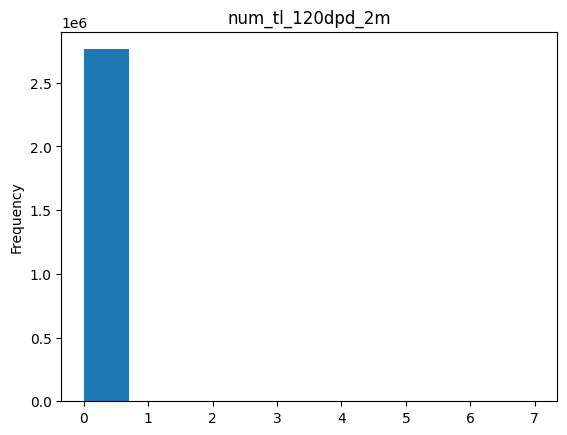

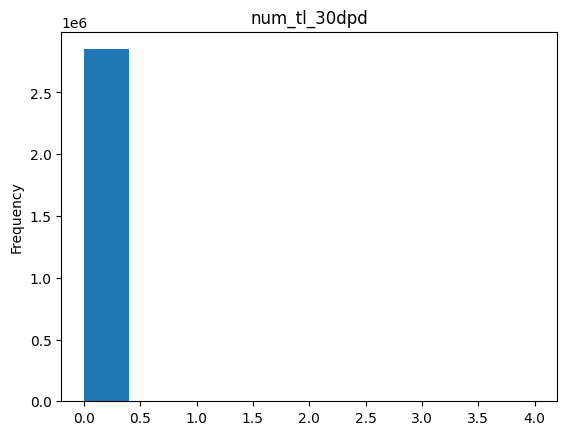

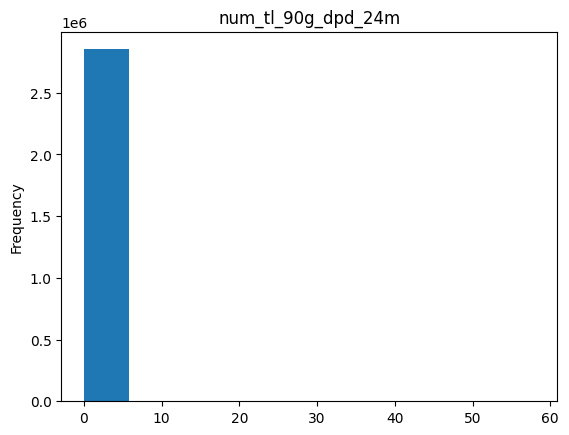

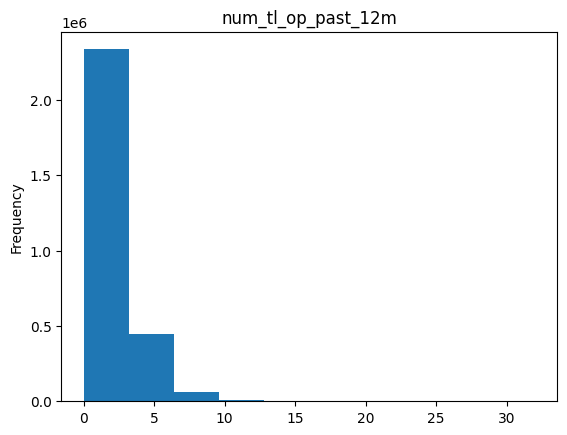

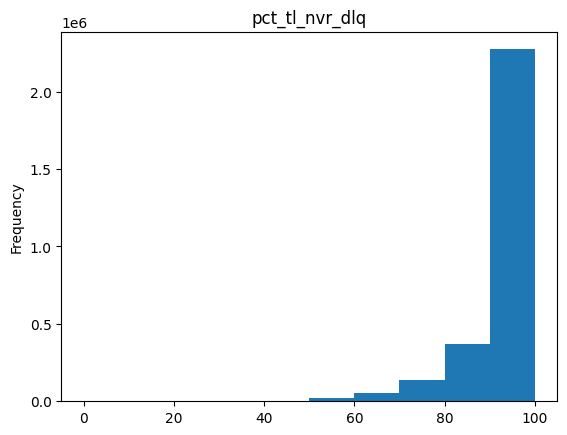

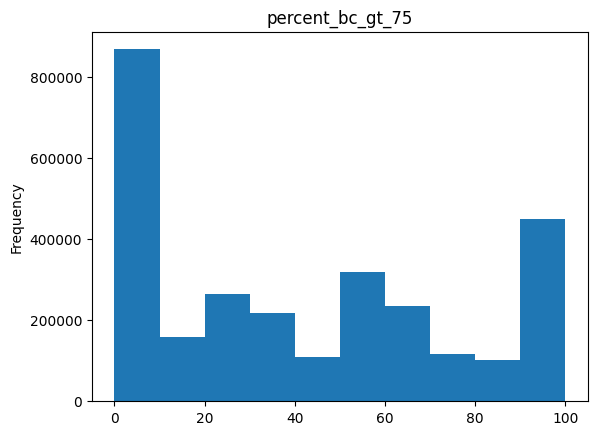

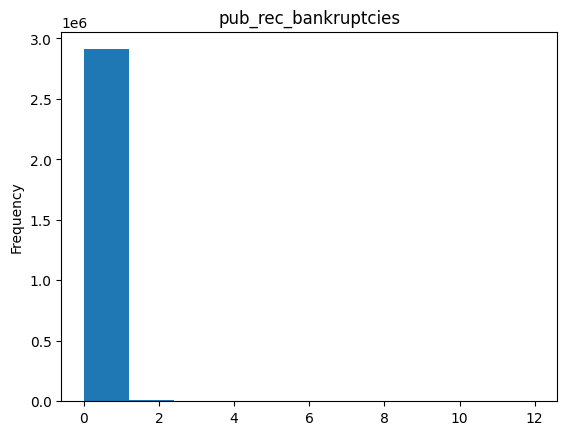

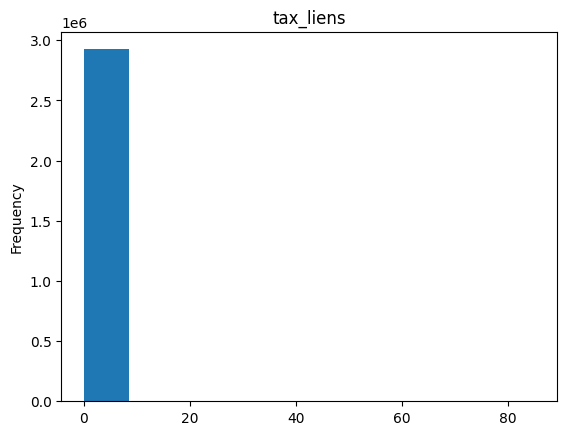

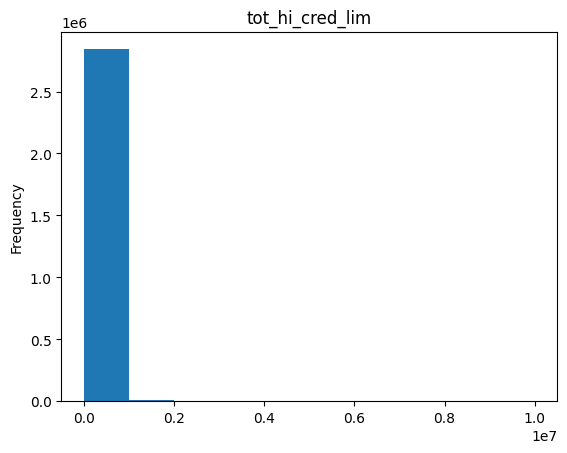

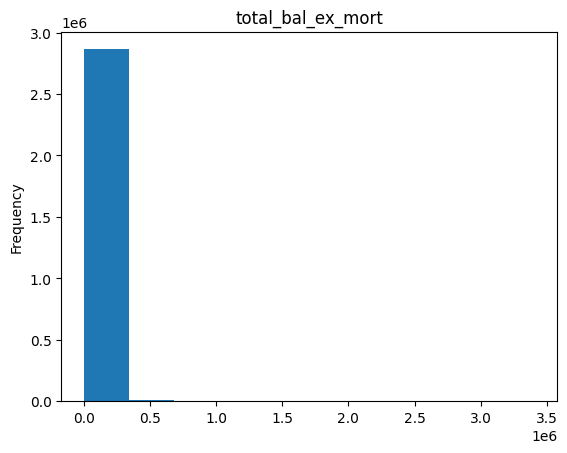

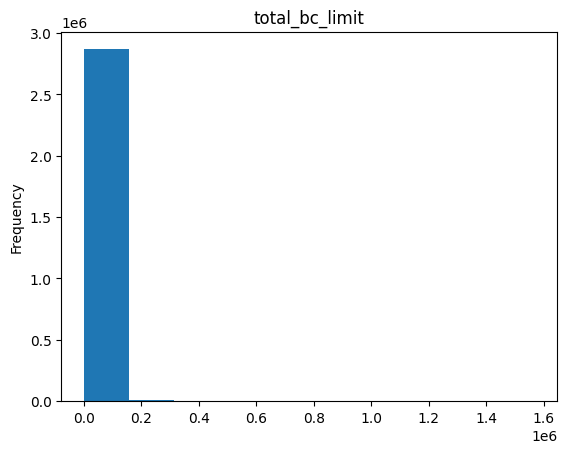

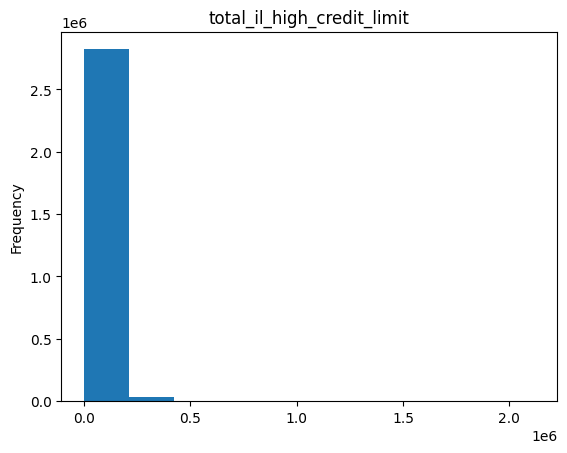

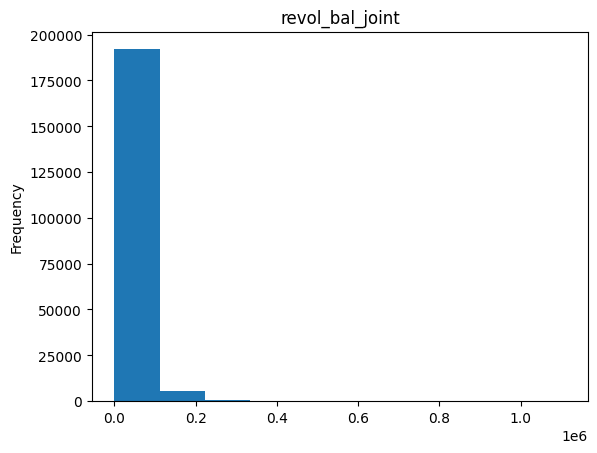

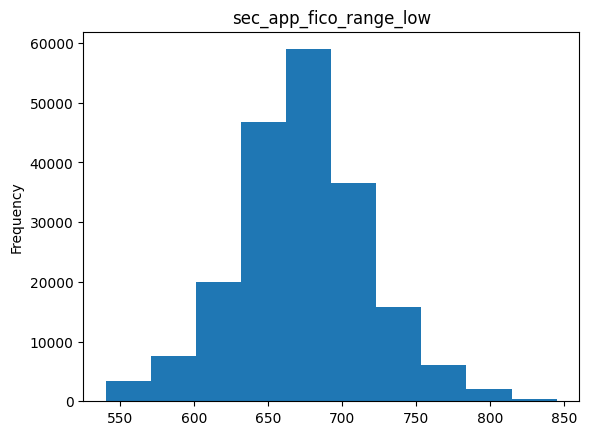

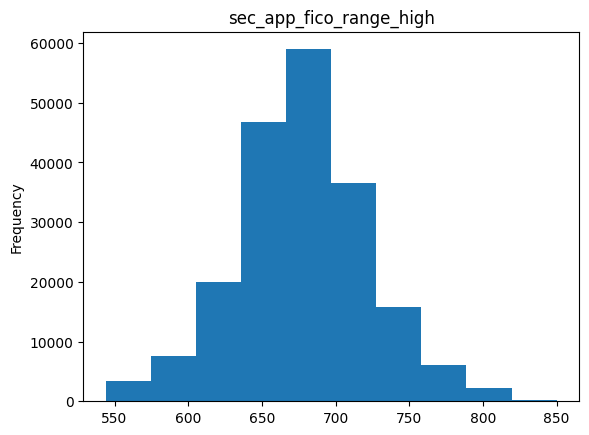

sec_app_earliest_cr_line has 697 unique values -- ommited


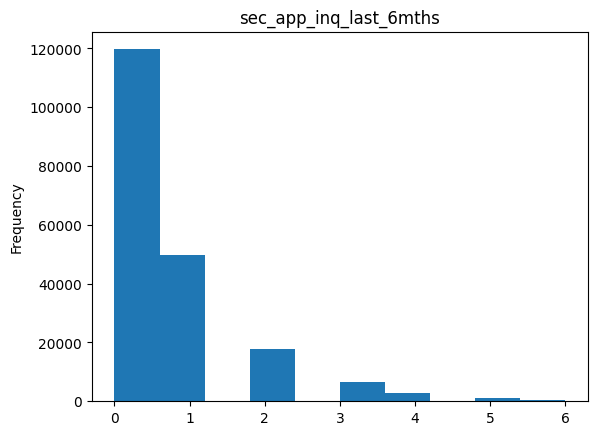

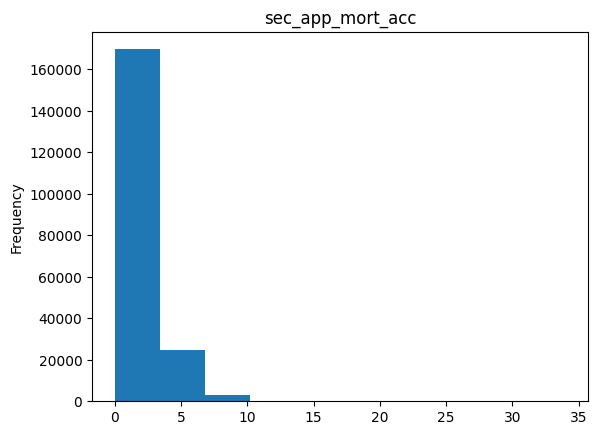

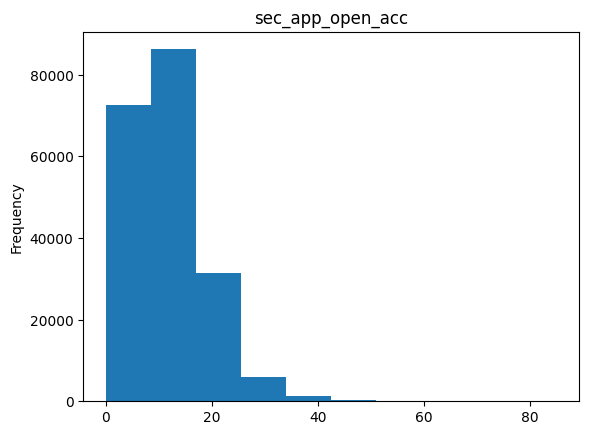

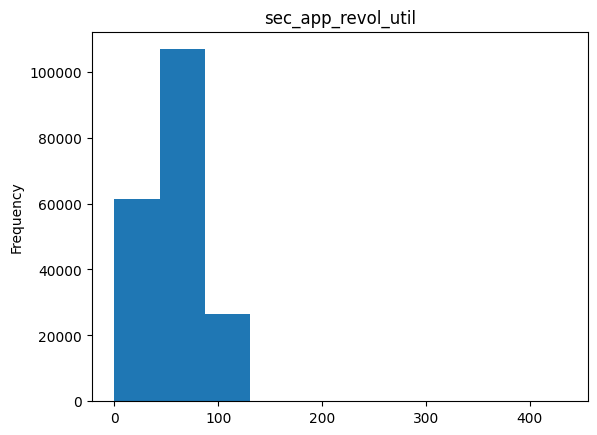

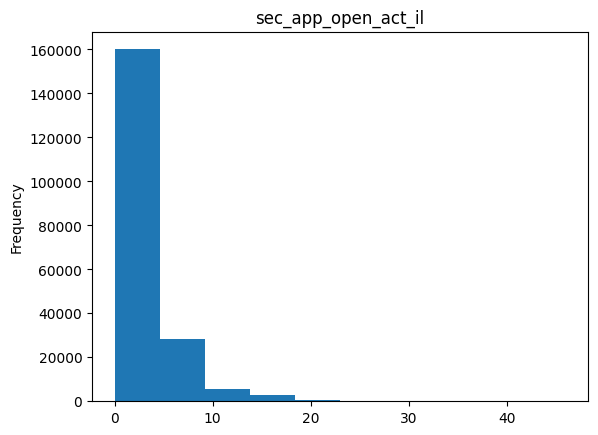

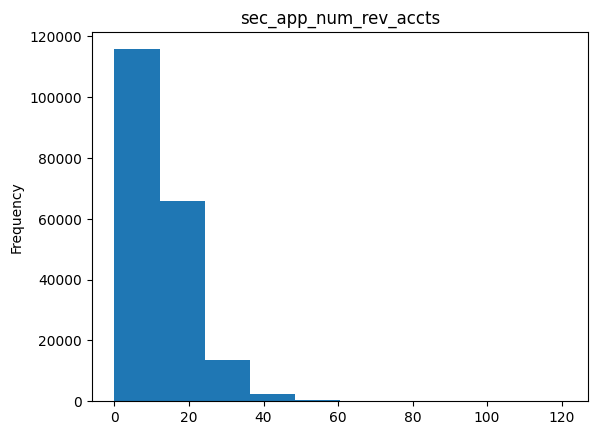

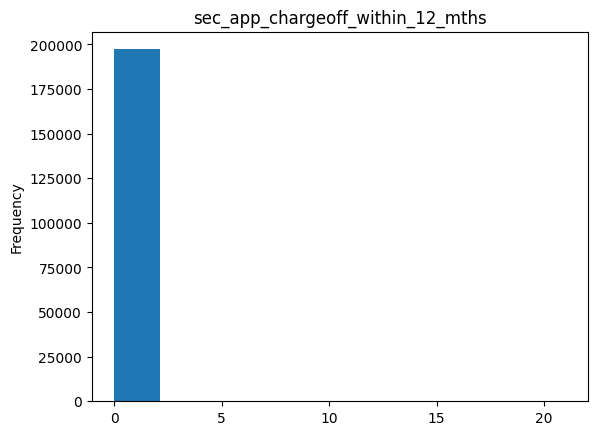

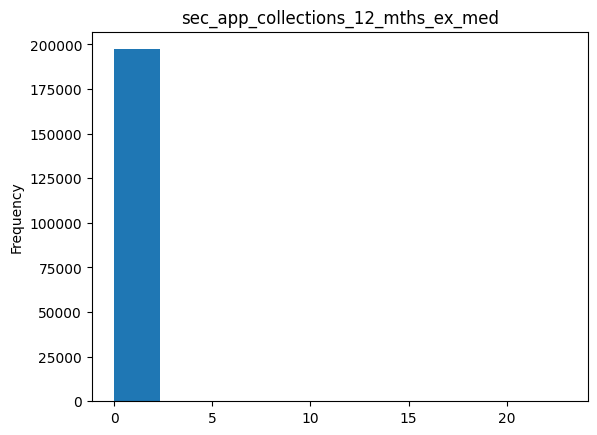

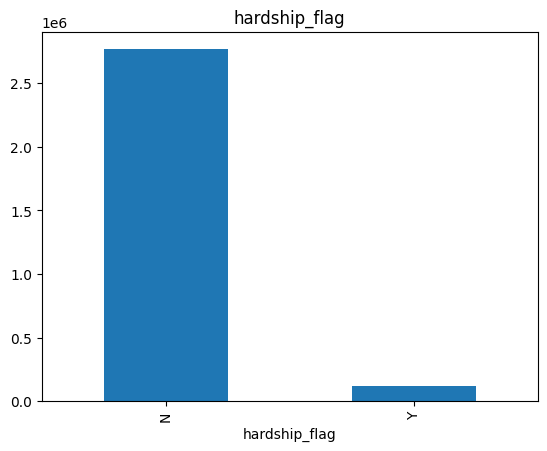

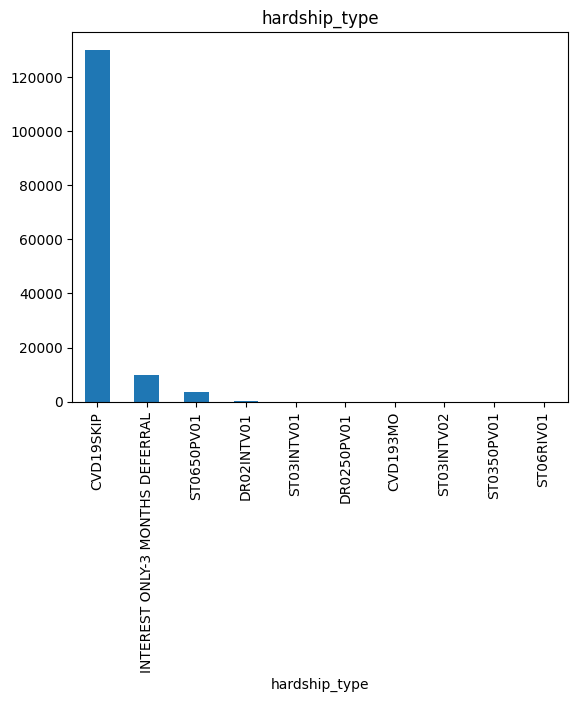

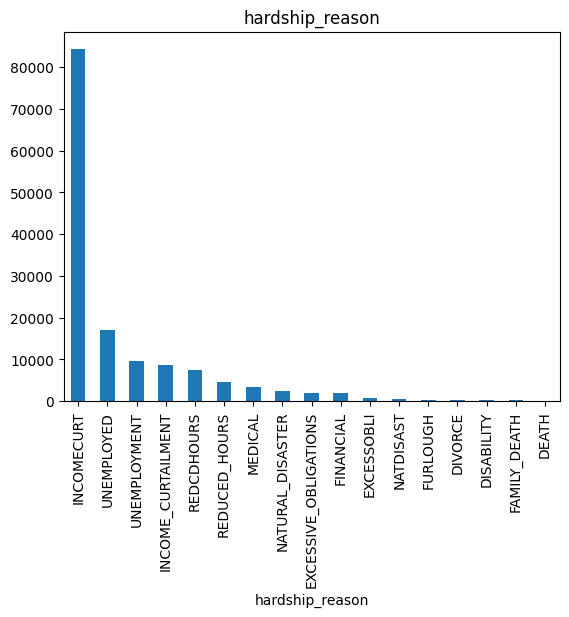

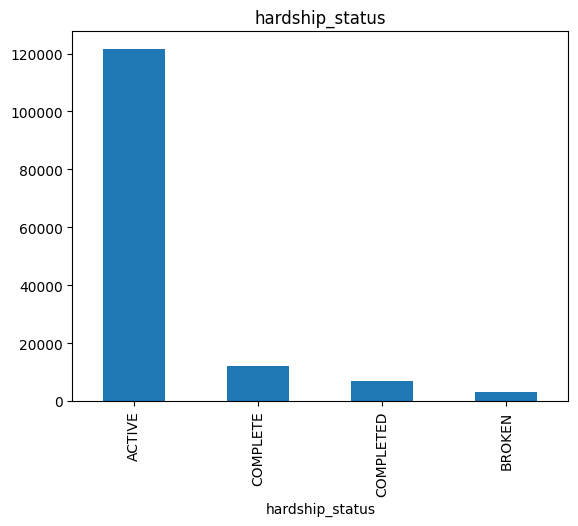

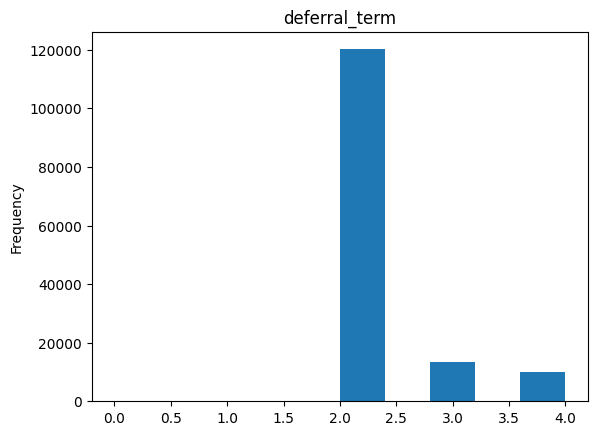

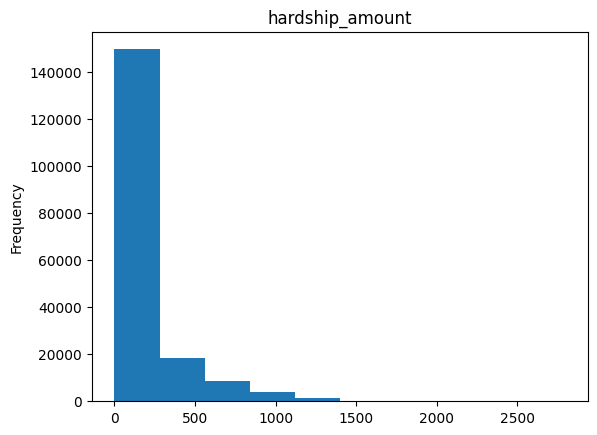

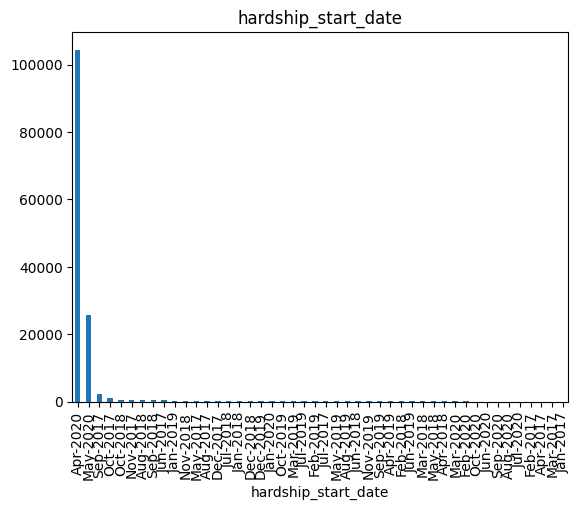

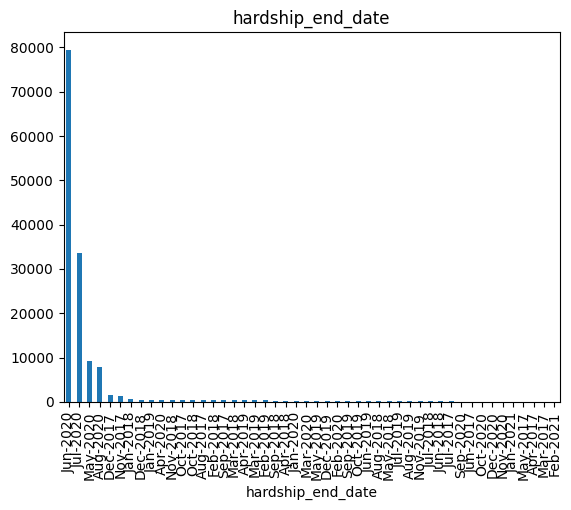

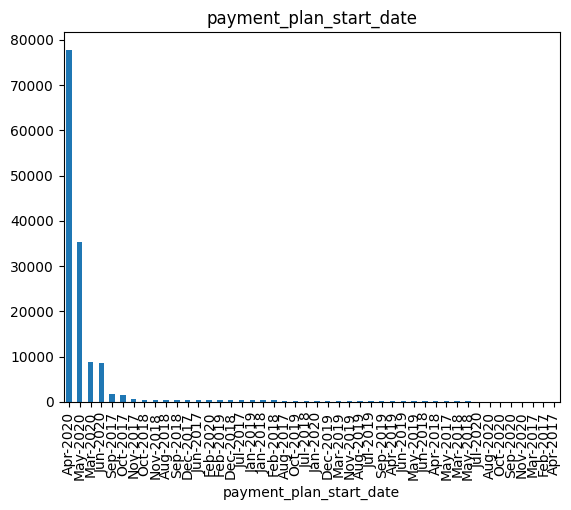

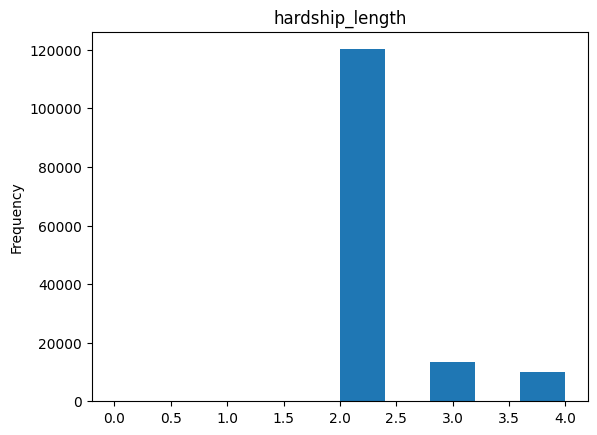

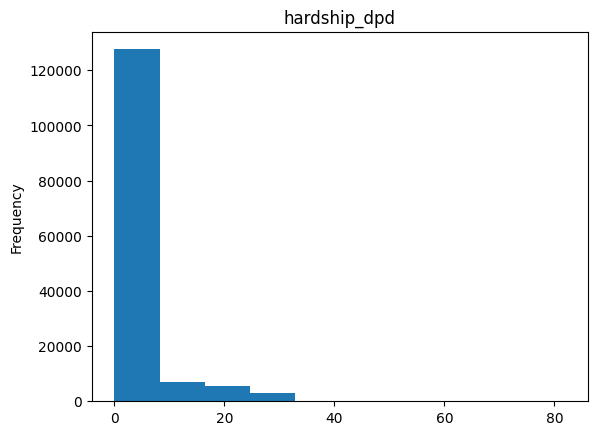

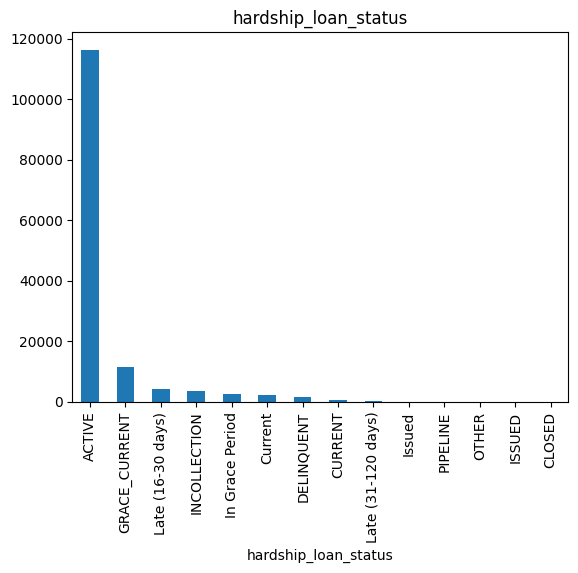

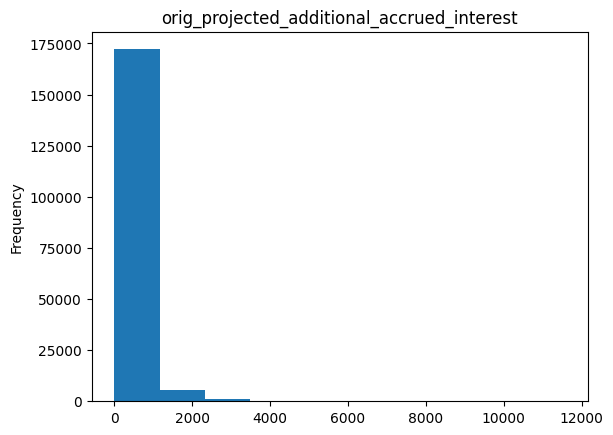

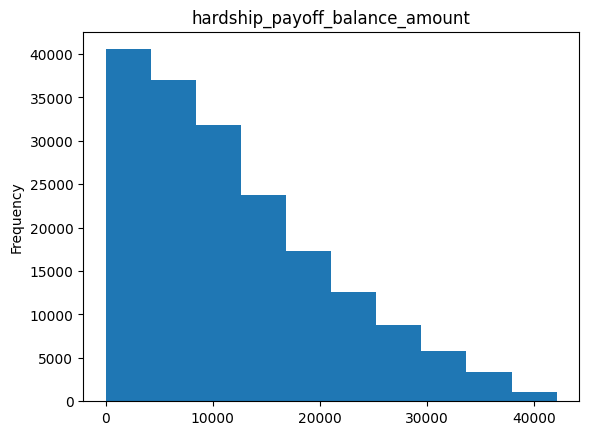

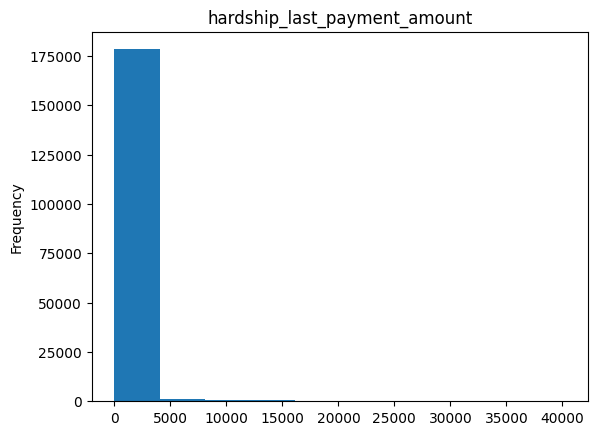

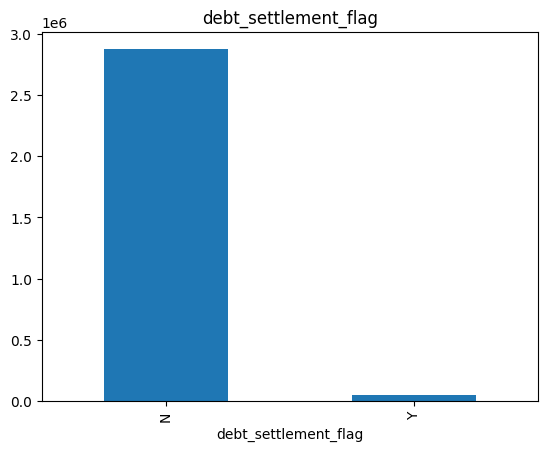

In [23]:
for col in data.columns:
    if data[col].dtype == object:
        if data[col].nunique() > 100:
            print(f"{col} has {data[col].nunique()} unique values -- ommited")
            continue
        data[col].value_counts().plot(kind='bar')
    else:
        data[col].plot(kind='hist')
    plt.title(col)
    plt.show()

# Preprocessing

- What are the conclusions? How to clean up the data?
- How to save it efficiently?

# Homework 

- analyse your data, preferably different situations for each group 
- recommendations, forecasting (e.g. traffic or energy consumption), classification (binary, multiclass, multilabel), regression  
- it can be a part of your project! 
- let's discuss interesting findings and specific techniques for your case next week :) 